In [ ]:
import pandas as pd
import numpy as np
import cv2
import skimage.transform as st
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from matplotlib import pyplot as plt
import os
import sklearn
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
import math
import random
import operator
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,roc_curve,auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers  
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import pickle as pkl
import warnings
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout,MaxPool2D
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.inception_v3 import InceptionV3
import torch
from torchvision import datasets, transforms
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Creazione del dataset dai KPI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -avr 'drive/My Drive/dati.zip' ./
!unzip -qq './dati.zip' -d './'

Mounted at /content/drive
'drive/My Drive/dati.zip' -> './dati.zip'


In [ ]:
files=sorted(glob.glob("./tabelle/*.csv"))
arr = sorted([os.path.splitext(filename)[0] for filename in os.listdir('./tabelle/')])

In [ ]:
tabelle7gg2018=[]
tabelle7gg2019=[]
tabelle7gg2020=[]
tabelle15gg2018=[]
tabelle15gg2019=[]
tabelle15gg2020=[]
tabelle30gg2018=[]
tabelle30gg2019=[]
tabelle30gg2020=[]
i=0
j=3
h=6
while (h<len(files)):
    tab1=pd.read_csv(files[i],index_col=None)
    tab1=tab1.rename(columns={'Value':arr[i]})
    tabelle30gg2018.append(tab1)
    tab2=pd.read_csv(files[i+1],index_col=None)
    tab2=tab2.rename(columns={'Value':arr[i+1]})
    tabelle30gg2019.append(tab2)
    tab3=pd.read_csv(files[i+2],index_col=None)
    tab3=tab3.rename(columns={'Value':arr[i+2]})
    tabelle30gg2020.append(tab3)
    i=i+9
    tab1=pd.read_csv(files[j],index_col=None)
    tab1=tab1.rename(columns={'Value':arr[j]})
    tabelle7gg2018.append(tab1)
    tab2=pd.read_csv(files[j+1],index_col=None)
    tab2=tab2.rename(columns={'Value':arr[j+1]})
    tabelle7gg2019.append(tab2)
    tab3=pd.read_csv(files[j+2],index_col=None)
    tab3=tab3.rename(columns={'Value':arr[j+2]})
    tabelle7gg2020.append(tab3)
    j=j+9
    tab1=pd.read_csv(files[h],index_col=None)
    tab1=tab1.rename(columns={'Value':arr[h]})
    tabelle15gg2018.append(tab1)
    tab2=pd.read_csv(files[h+1],index_col=None)
    tab2=tab2.rename(columns={'Value':arr[h+1]})
    tabelle15gg2019.append(tab2)
    tab3=pd.read_csv(files[h+2],index_col=None)
    tab3=tab3.rename(columns={'Value':arr[h+2]})
    tabelle15gg2020.append(tab3)
    h=h+9  

In [ ]:
tabelle7gg2018[0]

,ID,costoS2018
0,1,173611.55909
1,2,238598.94887
2,3,223596.04487
3,4,235867.28252
4,5,234566.82341
5,6,249100.81388
6,7,201718.83164
7,8,151963.49538
8,9,198929.59171
9,10,245025.94749


In [ ]:
tabelle15gg2018[0]

,ID,costoSS2018
0,1,412210.50796
1,2,459463.32739
2,3,483667.63729
3,4,353682.32702
4,5,443955.53920
5,6,841715.91412
6,7,312296.61858
7,8,395985.02421
8,9,389771.20710
9,10,363601.39311


In [ ]:
tabelle30gg2018[0]

,ID,costoM2018
0,1,8.716738e+05
1,2,8.373500e+05
2,3,1.285671e+06
3,4,7.082816e+05
4,5,7.533726e+05
5,6,6.888277e+05
6,7,8.854170e+05
7,8,1.109794e+06
8,9,7.820750e+05
9,10,8.902055e+05


# Creazione e preprocessing delle tabelle

In [ ]:
tab7gg2018=pd.merge(tabelle7gg2018[0],tabelle7gg2018[1])

for i in range(2,len(tabelle7gg2018)):
    tab7gg2018=pd.merge(tab7gg2018,tabelle7gg2018[i])
tab7gg2018 = tab7gg2018.assign(margineS2018 = tab7gg2018['vendutoS2018'] - tab7gg2018['costoS2018'])
tab7gg2018.drop('ID',axis=1,inplace=True)
tab7gg2018

,costoS2018,marginePercSpeditoMobileAverageS2018,percMargineS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,vendutoS2018,margineS2018
0,173611.55909,43.777438,0.382267,1.0,281046.347650,107434.788560
1,238598.94887,30.462190,0.275797,1.0,329464.322985,90865.374115
2,223596.04487,25.553304,0.252653,1.0,299186.495240,75590.450370
3,235867.28252,27.740722,0.246410,1.0,312991.570481,77124.287961
4,234566.82341,23.689413,0.248969,1.0,312326.715490,77759.892080
5,249100.81388,26.732053,0.280089,1.0,346016.533371,96915.719491
6,201718.83164,27.857213,0.244377,1.0,266957.057600,65238.225960
7,151963.49538,29.550659,0.295689,1.0,215762.016498,63798.521118
8,198929.59171,33.357287,0.265463,1.0,270823.439880,71893.848170
9,245025.94749,36.333872,0.279703,1.0,340173.542522,95147.595032


In [ ]:
column_names_to_normalize = ['costoS2018', 'marginePercSpeditoMobileAverageS2018', 'percMargineS2018', 'vendutoS2018', 'margineS2018']
x = tab7gg2018[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab7gg2018.index)
tab7gg2018[column_names_to_normalize] = df_temp
tab7gg2018

,costoS2018,marginePercSpeditoMobileAverageS2018,percMargineS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,vendutoS2018,margineS2018
0,0.162591,0.946991,0.805198,1.0,0.243696,0.656066
1,0.295265,0.323939,0.517637,1.0,0.324301,0.526880
2,0.264636,0.094241,0.455128,1.0,0.273896,0.407787
3,0.289688,0.196595,0.438266,1.0,0.296878,0.419745
4,0.287033,0.007025,0.445178,1.0,0.295771,0.424701
5,0.316705,0.149397,0.529229,1.0,0.351857,0.574053
6,0.219973,0.202046,0.432776,1.0,0.220241,0.327074
7,0.118396,0.281287,0.571362,1.0,0.135013,0.315849
8,0.214279,0.459408,0.489726,1.0,0.226678,0.378965
9,0.308386,0.598689,0.528186,1.0,0.342130,0.560267


In [ ]:
x=tab7gg2018['trendMarginePercSpeditoByCompanyAndCostTypeS2018'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab7gg2018['trendMarginePercSpeditoByCompanyAndCostTypeS2018']=x
tab7gg2018

,costoS2018,marginePercSpeditoMobileAverageS2018,percMargineS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,vendutoS2018,margineS2018
0,0.162591,0.946991,0.805198,1.0,0.243696,0.656066
1,0.295265,0.323939,0.517637,1.0,0.324301,0.526880
2,0.264636,0.094241,0.455128,1.0,0.273896,0.407787
3,0.289688,0.196595,0.438266,1.0,0.296878,0.419745
4,0.287033,0.007025,0.445178,1.0,0.295771,0.424701
5,0.316705,0.149397,0.529229,1.0,0.351857,0.574053
6,0.219973,0.202046,0.432776,1.0,0.220241,0.327074
7,0.118396,0.281287,0.571362,1.0,0.135013,0.315849
8,0.214279,0.459408,0.489726,1.0,0.226678,0.378965
9,0.308386,0.598689,0.528186,1.0,0.342130,0.560267


In [ ]:
tab7gg2018=tab7gg2018*255
tab7gg2018=tab7gg2018.astype(int)
tab7gg2018

,costoS2018,marginePercSpeditoMobileAverageS2018,percMargineS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,vendutoS2018,margineS2018
0,41,241,205,255,62,167
1,75,82,131,255,82,134
2,67,24,116,255,69,103
3,73,50,111,255,75,107
4,73,1,113,255,75,108
5,80,38,134,255,89,146
6,56,51,110,255,56,83
7,30,71,145,255,34,80
8,54,117,124,255,57,96
9,78,152,134,255,87,142


In [ ]:
columnsTitles = ['vendutoS2018','costoS2018','margineS2018','percMargineS2018','marginePercSpeditoMobileAverageS2018','trendMarginePercSpeditoByCompanyAndCostTypeS2018']
tab7gg2018 = tab7gg2018.reindex(columns=columnsTitles)
tab7gg2018.to_csv('./tabelleRicavate/tab7gg2018',index=False)
tab7gg2018=pd.read_csv('./tabelleRicavate/tab7gg2018')
tab7gg2018

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255
8,57,54,96,124,117,255
9,87,78,142,134,152,255


In [ ]:
tab7gg2019=pd.merge(tabelle7gg2019[0],tabelle7gg2019[1])

for i in range(2,len(tabelle7gg2019)):
    tab7gg2019=pd.merge(tab7gg2019,tabelle7gg2019[i])
tab7gg2019 = tab7gg2019.assign(margineS2019 = tab7gg2019['vendutoS2019'] - tab7gg2019['costoS2019'])
tab7gg2019.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoS2019', 'marginePercSpeditoMobileAverageS2019', 'percMargineS2019', 'vendutoS2019', 'margineS2019']
x = tab7gg2019[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab7gg2019.index)
tab7gg2019[column_names_to_normalize] = df_temp
x=tab7gg2019['trendMarginePercSpeditoByCompanyAndCostTypeS2019'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab7gg2019['trendMarginePercSpeditoByCompanyAndCostTypeS2019']=x
tab7gg2019=tab7gg2019*255
tab7gg2019=tab7gg2019.astype(int)
columnsTitles = ['vendutoS2019','costoS2019','margineS2019','percMargineS2019','marginePercSpeditoMobileAverageS2019','trendMarginePercSpeditoByCompanyAndCostTypeS2019']
tab7gg2019 = tab7gg2019.reindex(columns=columnsTitles)
tab7gg2019.to_csv('./tabelleRicavate/tab7gg2019',index=False)
tab7gg2019=pd.read_csv('./tabelleRicavate/tab7gg2019')
tab7gg2019

,vendutoS2019,costoS2019,margineS2019,percMargineS2019,marginePercSpeditoMobileAverageS2019,trendMarginePercSpeditoByCompanyAndCostTypeS2019
0,75,81,56,41,245,255
1,97,36,255,255,224,255
2,111,75,193,169,254,255
3,98,93,98,74,235,255
4,66,72,52,43,235,255
5,65,68,61,55,104,0
6,58,59,62,62,224,255
7,41,37,68,86,227,255
8,26,28,43,64,211,255
9,23,17,62,98,235,255


In [ ]:
tab7gg2020=pd.merge(tabelle7gg2020[0],tabelle7gg2020[1])

for i in range(2,len(tabelle7gg2020)):
    tab7gg2020=pd.merge(tab7gg2020,tabelle7gg2020[i])
tab7gg2020 = tab7gg2020.assign(margineS2020 = tab7gg2020['vendutoS2020'] - tab7gg2020['costoS2020'])
tab7gg2020.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoS2020', 'marginePercSpeditoMobileAverageS2020', 'percMargineS2020', 'vendutoS2020', 'margineS2020']
x = tab7gg2020[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab7gg2020.index)
tab7gg2020[column_names_to_normalize] = df_temp
x=tab7gg2020['trendMarginePercSpeditoByCompanyAndCostTypeS2020'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab7gg2020['trendMarginePercSpeditoByCompanyAndCostTypeS2020']=x
tab7gg2020=tab7gg2020*255
tab7gg2020=tab7gg2020.astype(int)
columnsTitles = ['vendutoS2020','costoS2020','margineS2020','percMargineS2020','marginePercSpeditoMobileAverageS2020','trendMarginePercSpeditoByCompanyAndCostTypeS2020']
tab7gg2020 = tab7gg2020.reindex(columns=columnsTitles)
tab7gg2020.to_csv('./tabelleRicavate/tab7gg2020',index=False)
tab7gg2020=pd.read_csv('./tabelleRicavate/tab7gg2020')
tab7gg2020

,vendutoS2020,costoS2020,margineS2020,percMargineS2020,marginePercSpeditoMobileAverageS2020,trendMarginePercSpeditoByCompanyAndCostTypeS2020
0,67,84,28,28,46,255
1,157,171,64,43,72,255
2,176,211,48,5,255,255
3,154,179,51,22,62,255
4,137,169,37,5,43,255
5,122,155,32,2,14,255
6,125,159,32,0,5,255
7,25,54,0,11,0,255
8,104,116,48,46,48,255
9,187,210,67,31,107,255


In [ ]:
tab15gg2018=pd.merge(tabelle15gg2018[0],tabelle15gg2018[1])

for i in range(2,len(tabelle15gg2018)):
    tab15gg2018=pd.merge(tab15gg2018,tabelle15gg2018[i])
tab15gg2018 = tab15gg2018.assign(margineSS2018 = tab15gg2018['vendutoSS2018'] - tab15gg2018['costoSS2018'])
tab15gg2018.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoSS2018', 'marginePercSpeditoMobileAverageSS2018', 'percMargineSS2018', 'vendutoSS2018', 'margineSS2018']
x = tab15gg2018[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab15gg2018.index)
tab15gg2018[column_names_to_normalize] = df_temp
x=tab15gg2018['trendMarginePercSpeditoByCompanyAndCostTypeSS2018'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab15gg2018['trendMarginePercSpeditoByCompanyAndCostTypeSS2018']=x
tab15gg2018=tab15gg2018*255
tab15gg2018=tab15gg2018.astype(int)
columnsTitles = ['vendutoSS2018','costoSS2018','margineSS2018','percMargineSS2018','marginePercSpeditoMobileAverageSS2018','trendMarginePercSpeditoByCompanyAndCostTypeSS2018']
tab15gg2018 = tab15gg2018.reindex(columns=columnsTitles)
tab15gg2018.to_csv('./tabelleRicavate/tab15gg2018',index=False)
tab15gg2018=pd.read_csv('./tabelleRicavate/tab15gg2018')
tab15gg2018

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255
4,68,66,101,126,181,255
5,255,255,237,69,150,255
6,0,3,28,134,137,255
7,48,43,94,149,207,255
8,43,40,86,145,230,255
9,46,28,140,220,169,255


In [ ]:
tab15gg2019=pd.merge(tabelle15gg2019[0],tabelle15gg2019[1])

for i in range(2,len(tabelle15gg2019)):
    tab15gg2019=pd.merge(tab15gg2019,tabelle15gg2019[i])
tab15gg2019 = tab15gg2019.assign(margineSS2019 = tab15gg2019['vendutoSS2019'] - tab15gg2019['costoSS2019'])
tab15gg2019.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoSS2019', 'marginePercSpeditoMobileAverageSS2019', 'percMargineSS2019', 'vendutoSS2019', 'margineSS2019']
x = tab15gg2019[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab15gg2019.index)
tab15gg2019[column_names_to_normalize] = df_temp
x=tab15gg2019['trendMarginePercSpeditoByCompanyAndCostTypeSS2019'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab15gg2019['trendMarginePercSpeditoByCompanyAndCostTypeSS2019']=x
tab15gg2019=tab15gg2019*255
tab15gg2019=tab15gg2019.astype(int)
columnsTitles = ['vendutoSS2019','costoSS2019','margineSS2019','percMargineSS2019','marginePercSpeditoMobileAverageSS2019','trendMarginePercSpeditoByCompanyAndCostTypeSS2019']
tab15gg2019 = tab15gg2019.reindex(columns=columnsTitles)
tab15gg2019.to_csv('./tabelleRicavate/tab15gg2019',index=False)
tab15gg2019=pd.read_csv('./tabelleRicavate/tab15gg2019')
tab15gg2019

,vendutoSS2019,costoSS2019,margineSS2019,percMargineSS2019,marginePercSpeditoMobileAverageSS2019,trendMarginePercSpeditoByCompanyAndCostTypeSS2019
0,91,55,250,255,220,255
1,119,94,234,204,239,255
2,61,73,84,77,0,0
3,37,38,99,120,224,255
4,0,0,78,132,240,255
5,76,97,69,44,234,255
6,184,197,166,76,197,255
7,119,140,96,46,221,255
8,3,9,62,102,212,255
9,19,36,42,54,254,255


In [ ]:
tab15gg2020=pd.merge(tabelle15gg2020[0],tabelle15gg2020[1])

for i in range(2,len(tabelle15gg2020)):
    tab15gg2020=pd.merge(tab15gg2020,tabelle15gg2020[i])
tab15gg2020 = tab15gg2020.assign(margineSS2020 = tab15gg2020['vendutoSS2020'] - tab15gg2020['costoSS2020'])
tab15gg2020.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoSS2020', 'marginePercSpeditoMobileAverageSS2020', 'percMargineSS2020', 'vendutoSS2020', 'margineSS2020']
x = tab15gg2020[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab15gg2020.index)
tab15gg2020[column_names_to_normalize] = df_temp
x=tab15gg2020['trendMarginePercSpeditoByCompanyAndCostTypeSS2020'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab15gg2020['trendMarginePercSpeditoByCompanyAndCostTypeSS2020']=x
tab15gg2020=tab15gg2020*255
tab15gg2020=tab15gg2020.astype(int)
columnsTitles = ['vendutoSS2020','costoSS2020','margineSS2020','percMargineSS2020','marginePercSpeditoMobileAverageSS2020','trendMarginePercSpeditoByCompanyAndCostTypeSS2020']
tab15gg2020 = tab15gg2020.reindex(columns=columnsTitles)
tab15gg2020.to_csv('./tabelleRicavate/tab15gg2020',index=False)
tab15gg2020=pd.read_csv('./tabelleRicavate/tab15gg2020')
tab15gg2020

,vendutoSS2020,costoSS2020,margineSS2020,percMargineSS2020,marginePercSpeditoMobileAverageSS2020,trendMarginePercSpeditoByCompanyAndCostTypeSS2020
0,128,145,47,48,75,255
1,215,250,54,14,65,255
2,157,198,25,0,14,255
3,75,112,0,1,0,255
4,184,200,69,49,111,255
5,233,128,255,254,254,255
6,129,131,67,78,130,255
7,0,0,21,99,115,255
8,78,82,46,79,125,255
9,7,6,26,102,108,255


In [ ]:
tab30gg2018=pd.merge(tabelle30gg2018[0],tabelle30gg2018[1])

for i in range(2,len(tabelle30gg2018)):
    tab30gg2018=pd.merge(tab30gg2018,tabelle30gg2018[i])
tab30gg2018 = tab30gg2018.assign(margineM2018 = tab30gg2018['vendutoM2018'] - tab30gg2018['costoM2018'])
tab30gg2018.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoM2018', 'marginePercSpeditoMobileAverageM2018', 'percMargineM2018', 'vendutoM2018', 'margineM2018']
x = tab30gg2018[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab30gg2018.index)
tab30gg2018[column_names_to_normalize] = df_temp
x=tab30gg2018['trendMarginePercSpeditoByCompanyAndCostTypeM2018'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab30gg2018['trendMarginePercSpeditoByCompanyAndCostTypeM2018']=x
tab30gg2018=tab30gg2018*255
tab30gg2018=tab30gg2018.astype(int)
columnsTitles = ['vendutoM2018','costoM2018','margineM2018','percMargineM2018','marginePercSpeditoMobileAverageM2018','trendMarginePercSpeditoByCompanyAndCostTypeM2018']
tab30gg2018 = tab30gg2018.reindex(columns=columnsTitles)
tab30gg2018.to_csv('./tabelleRicavate/tab30gg2018',index=False)
tab30gg2018=pd.read_csv('./tabelleRicavate/tab30gg2018')
tab30gg2018

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255
2,255,255,190,26,150,255
3,0,8,14,118,207,255
4,39,27,99,187,169,255
5,20,0,115,250,255,255
6,129,83,254,255,179,255
7,187,179,173,76,59,255
8,42,39,73,141,117,255
9,61,86,0,0,0,255


In [ ]:
tab30gg2019=pd.merge(tabelle30gg2019[0],tabelle30gg2019[1])

for i in range(2,len(tabelle30gg2019)):
    tab30gg2019=pd.merge(tab30gg2019,tabelle30gg2019[i])
tab30gg2019 = tab30gg2019.assign(margineM2019 = tab30gg2019['vendutoM2019'] - tab30gg2019['costoM2019'])
tab30gg2019.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoM2019', 'marginePercSpeditoMobileAverageM2019', 'percMargineM2019', 'vendutoM2019', 'margineM2019']
x = tab30gg2019[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab30gg2019.index)
tab30gg2019[column_names_to_normalize] = df_temp
x=tab30gg2019['trendMarginePercSpeditoByCompanyAndCostTypeM2019'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab30gg2019['trendMarginePercSpeditoByCompanyAndCostTypeM2019']=x
tab30gg2019=tab30gg2019*255
tab30gg2019=tab30gg2019.astype(int)
columnsTitles = ['vendutoM2019','costoM2019','margineM2019','percMargineM2019','marginePercSpeditoMobileAverageM2019','trendMarginePercSpeditoByCompanyAndCostTypeM2019']
tab30gg2019 = tab30gg2019.reindex(columns=columnsTitles)
tab30gg2019.to_csv('./tabelleRicavate/tab30gg2019',index=False)
tab30gg2019=pd.read_csv('./tabelleRicavate/tab30gg2019')
tab30gg2019

,vendutoM2019,costoM2019,margineM2019,percMargineM2019,marginePercSpeditoMobileAverageM2019,trendMarginePercSpeditoByCompanyAndCostTypeM2019
0,163,99,255,254,176,255
1,65,67,89,107,103,255
2,46,54,69,90,150,255
3,243,255,132,67,86,255
4,0,11,46,85,255,255
5,23,61,0,0,35,255
6,224,229,139,83,73,255
7,231,220,173,118,0,255
8,58,58,90,113,90,255
9,2,0,75,128,77,255


In [ ]:
tab30gg2020=pd.merge(tabelle30gg2020[0],tabelle30gg2020[1])

for i in range(2,len(tabelle30gg2020)):
    tab30gg2020=pd.merge(tab30gg2020,tabelle30gg2020[i])
tab30gg2020 = tab30gg2020.assign(margineM2020 = tab30gg2020['vendutoM2020'] - tab30gg2020['costoM2020'])
tab30gg2020.drop('ID',axis=1,inplace=True)
column_names_to_normalize = ['costoM2020', 'marginePercSpeditoMobileAverageM2020', 'percMargineM2020', 'vendutoM2020', 'margineM2020']
x = tab30gg2020[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index =  tab30gg2020.index)
tab30gg2020[column_names_to_normalize] = df_temp
x=tab30gg2020['trendMarginePercSpeditoByCompanyAndCostTypeM2020'].values
for i in range(len(x)):
    if(x[i]==-1):
        x[i]=0
tab30gg2020['trendMarginePercSpeditoByCompanyAndCostTypeM2020']=x
tab30gg2020=tab30gg2020*255
tab30gg2020=tab30gg2020.astype(int)
columnsTitles = ['vendutoM2020','costoM2020','margineM2020','percMargineM2020','marginePercSpeditoMobileAverageM2020','trendMarginePercSpeditoByCompanyAndCostTypeM2020']
tab30gg2020 = tab30gg2020.reindex(columns=columnsTitles)
tab30gg2020.to_csv('./tabelleRicavate/tab30gg2020',index=False)
tab30gg2020=pd.read_csv('./tabelleRicavate/tab30gg2020')
tab30gg2020

,vendutoM2020,costoM2020,margineM2020,percMargineM2020,marginePercSpeditoMobileAverageM2020,trendMarginePercSpeditoByCompanyAndCostTypeM2020
0,205,254,65,47,65,255
1,132,193,0,0,0,255
2,255,206,255,255,254,255
3,63,64,54,141,115,255
4,35,33,40,145,108,255
5,66,62,64,155,130,255
6,149,136,130,181,66,255
7,231,251,128,113,82,255
8,0,0,14,134,116,255
9,20,12,39,160,118,255


In [ ]:
def genera(t,indice,limite):
    tabs=[]
    i=0
    j=indice
    while i<limite:
        tabs.append(t.iloc[i:j,:])
        i=j
        j=j+indice
    return tabs

# Creazione tabellare con vista sul periodo

In [ ]:
tabelleSett7gg18=genera(tab7gg2018,1,48)
tabelleSett7gg19=genera(tab7gg2019,1,48)
tabelleSett7gg20=genera(tab7gg2020,1,48)
tabelleSett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255


In [ ]:
tabelle2Sett7gg18=genera(tab7gg2018,2,48)
tabelle2Sett7gg19=genera(tab7gg2019,2,48)
tabelle2Sett7gg20=genera(tab7gg2020,2,48)
tabelle2Sett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255


In [ ]:
tabelleMese7gg18=genera(tab7gg2018,4,48)
tabelleMese7gg19=genera(tab7gg2019,4,48)
tabelleMese7gg20=genera(tab7gg2020,4,48)
tabelleMese7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255


In [ ]:
tabelle2Sett15gg18=genera(tab15gg2018,1,24)
tabelle2Sett15gg19=genera(tab15gg2019,1,24)
tabelle2Sett15gg20=genera(tab15gg2020,1,24)
tabelle2Sett15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255


In [ ]:
tabelleMese15gg18=genera(tab15gg2018,2,24)
tabelleMese15gg19=genera(tab15gg2019,2,24)
tabelleMese15gg20=genera(tab15gg2020,2,24)
tabelleMese15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255


In [ ]:
tabelleMese30gg18=genera(tab30gg2018,1,12)
tabelleMese30gg19=genera(tab30gg2019,1,12)
tabelleMese30gg20=genera(tab30gg2020,1,12)
tabelleMese30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255


In [ ]:
tabelleBim7gg18=genera(tab7gg2018,8,48)
tabelleBim7gg19=genera(tab7gg2019,8,48)
tabelleBim7gg20=genera(tab7gg2020,8,48)
tabelleBim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255


In [ ]:
tabelleTrim7gg18=genera(tab7gg2018,12,48)
tabelleTrim7gg19=genera(tab7gg2019,12,48)
tabelleTrim7gg20=genera(tab7gg2020,12,48)
tabelleTrim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255
8,57,54,96,124,117,255
9,87,78,142,134,152,255


In [ ]:
tabelleQuad7gg18=genera(tab7gg2018,16,48)
tabelleQuad7gg19=genera(tab7gg2019,16,48)
tabelleQuad7gg20=genera(tab7gg2020,16,48)
tabelleQuad7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255
8,57,54,96,124,117,255
9,87,78,142,134,152,255


In [ ]:
tabelleSem7gg18=genera(tab7gg2018,24,48)
tabelleSem7gg19=genera(tab7gg2019,24,48)
tabelleSem7gg20=genera(tab7gg2020,24,48)
tabelleSem7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255
8,57,54,96,124,117,255
9,87,78,142,134,152,255


In [ ]:
tabelleNov7gg18=genera(tab7gg2018,36,48)
tabelleNov7gg19=genera(tab7gg2019,36,48)
tabelleNov7gg20=genera(tab7gg2020,36,48)
tabelleNov7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018
0,62,41,167,205,241,255
1,82,75,134,131,82,255
2,69,67,103,116,24,255
3,75,73,107,111,50,255
4,75,73,108,113,1,255
5,89,80,146,134,38,255
6,56,56,83,110,51,255
7,34,30,80,145,71,255
8,57,54,96,124,117,255
9,87,78,142,134,152,255


In [ ]:
tabelleBim15gg18=genera(tab15gg2018,4,24)
tabelleBim15gg19=genera(tab15gg2019,4,24)
tabelleBim15gg20=genera(tab15gg2020,4,24)
tabelleBim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255


In [ ]:
tabelleTrim15gg18=genera(tab15gg2018,6,24)
tabelleTrim15gg19=genera(tab15gg2019,6,24)
tabelleTrim15gg20=genera(tab15gg2020,6,24)
tabelleTrim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255
4,68,66,101,126,181,255
5,255,255,237,69,150,255


In [ ]:
tabelleQuad15gg18=genera(tab15gg2018,8,24)
tabelleQuad15gg19=genera(tab15gg2019,8,24)
tabelleQuad15gg20=genera(tab15gg2020,8,24)
tabelleQuad15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255
4,68,66,101,126,181,255
5,255,255,237,69,150,255
6,0,3,28,134,137,255
7,48,43,94,149,207,255


In [ ]:
tabelleSem15gg18=genera(tab15gg2018,12,24)
tabelleSem15gg19=genera(tab15gg2019,12,24)
tabelleSem15gg20=genera(tab15gg2020,12,24)
tabelleSem15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255
4,68,66,101,126,181,255
5,255,255,237,69,150,255
6,0,3,28,134,137,255
7,48,43,94,149,207,255
8,43,40,86,145,230,255
9,46,28,140,220,169,255


In [ ]:
tabelleNov15gg18=genera(tab15gg2018,18,24)
tabelleNov15gg19=genera(tab15gg2019,18,24)
tabelleNov15gg20=genera(tab15gg2020,18,24)
tabelleNov15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018
0,68,51,152,194,98,255
1,69,73,79,95,59,255
2,86,85,114,115,45,255
3,19,23,41,118,85,255
4,68,66,101,126,181,255
5,255,255,237,69,150,255
6,0,3,28,134,137,255
7,48,43,94,149,207,255
8,43,40,86,145,230,255
9,46,28,140,220,169,255


In [ ]:
tabelleBim30gg18=genera(tab30gg2018,2,12)
tabelleBim30gg19=genera(tab30gg2019,2,12)
tabelleBim30gg20=genera(tab30gg2020,2,12)
tabelleBim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255


In [ ]:
tabelleTrim30gg18=genera(tab30gg2018,3,12)
tabelleTrim30gg19=genera(tab30gg2019,3,12)
tabelleTrim30gg20=genera(tab30gg2020,3,12)
tabelleTrim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255
2,255,255,190,26,150,255


In [ ]:
tabelleQuad30gg18=genera(tab30gg2018,4,12)
tabelleQuad30gg19=genera(tab30gg2019,4,12)
tabelleQuad30gg20=genera(tab30gg2020,4,12)
tabelleQuad30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255
2,255,255,190,26,150,255
3,0,8,14,118,207,255


In [ ]:
tabelleSem30gg18=genera(tab30gg2018,6,12)
tabelleSem30gg19=genera(tab30gg2019,6,12)
tabelleSem30gg20=genera(tab30gg2020,6,12)
tabelleSem30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255
2,255,255,190,26,150,255
3,0,8,14,118,207,255
4,39,27,99,187,169,255
5,20,0,115,250,255,255


In [ ]:
tabelleNov30gg18=genera(tab30gg2018,9,12)
tabelleNov30gg19=genera(tab30gg2019,9,12)
tabelleNov30gg20=genera(tab30gg2020,9,12)
tabelleNov30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018
0,82,78,102,120,59,255
1,53,63,40,72,85,255
2,255,255,190,26,150,255
3,0,8,14,118,207,255
4,39,27,99,187,169,255
5,20,0,115,250,255,255
6,129,83,254,255,179,255
7,187,179,173,76,59,255
8,42,39,73,141,117,255


# Aggiunta vista sui consumi e sul mercato

In [ ]:
consumi=pd.read_csv('./tabelleRicavate/consumi.csv')
consumi

,consumi2018,consumi2019,consumi2020
0,255,128,255
1,128,255,255
2,128,0,128
3,128,0,255


In [ ]:
prezzi=pd.read_csv('./tabelleRicavate/prezzi.csv')
prezzi

,prezzi2018,prezzi2019,prezzi2020
0,0,0,128
1,0,0,0
2,0,0,128
3,128,128,128


In [ ]:
def aggiungiColSett(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        if(i==12 or i==24 or i==36):
            j=j+1
        tabs[i]=tabs[i].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][j].astype(int))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs 
    

In [ ]:
tabelleSett7gg18=aggiungiColSett(tabelleSett7gg18,'consumi2018',consumi,1)
tabelleSett7gg18=aggiungiColSett(tabelleSett7gg18,'prezzi2018',prezzi,1)

tabelleSett7gg19=aggiungiColSett(tabelleSett7gg19,'consumi2019',consumi,1)
tabelleSett7gg19=aggiungiColSett(tabelleSett7gg19,'prezzi2019',prezzi,1)

tabelleSett7gg20=aggiungiColSett(tabelleSett7gg20,'consumi2020',consumi,1)
tabelleSett7gg20=aggiungiColSett(tabelleSett7gg20,'prezzi2020',prezzi,1)

In [ ]:
tabelleSett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0


In [ ]:
def aggiungi2Col2Sett(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        if(i==6 or i==12 or i==18):
            j=j+1
        tabs[i]=tabs[i].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][j].astype(int))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs 

In [ ]:
tabelle2Sett7gg18=aggiungi2Col2Sett(tabelle2Sett7gg18,'consumi2018',consumi,2)
tabelle2Sett7gg18=aggiungi2Col2Sett(tabelle2Sett7gg18,'prezzi2018',prezzi,2)

tabelle2Sett7gg19=aggiungi2Col2Sett(tabelle2Sett7gg19,'consumi2019',consumi,2)
tabelle2Sett7gg19=aggiungi2Col2Sett(tabelle2Sett7gg19,'prezzi2019',prezzi,2)

tabelle2Sett7gg20=aggiungi2Col2Sett(tabelle2Sett7gg20,'consumi2020',consumi,2)
tabelle2Sett7gg20=aggiungi2Col2Sett(tabelle2Sett7gg20,'prezzi2020',prezzi,2)

In [ ]:
tabelle2Sett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0


In [ ]:
def aggiungiColMese(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        if(i==3 or i==6 or i==9):
            j=j+1
        tabs[i]=tabs[i].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][j].astype(int))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs

In [ ]:
tabelleMese7gg18=aggiungiColMese(tabelleMese7gg18,'consumi2018',consumi,4)
tabelleMese7gg18=aggiungiColMese(tabelleMese7gg18,'prezzi2018',prezzi,4)

tabelleMese7gg19=aggiungiColMese(tabelleMese7gg19,'consumi2019',consumi,4)
tabelleMese7gg19=aggiungiColMese(tabelleMese7gg19,'prezzi2019',prezzi,4)

tabelleMese7gg20=aggiungiColMese(tabelleMese7gg20,'consumi2020',consumi,4)
tabelleMese7gg20=aggiungiColMese(tabelleMese7gg20,'prezzi2020',prezzi,4)

In [ ]:
tabelleMese7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0


In [ ]:
tabelle2Sett15gg18=aggiungi2Col2Sett(tabelle2Sett15gg18,'consumi2018',consumi,1)
tabelle2Sett15gg18=aggiungi2Col2Sett(tabelle2Sett15gg18,'prezzi2018',prezzi,1)

tabelle2Sett15gg19=aggiungi2Col2Sett(tabelle2Sett15gg19,'consumi2019',consumi,1)
tabelle2Sett15gg19=aggiungi2Col2Sett(tabelle2Sett15gg19,'prezzi2019',prezzi,1)

tabelle2Sett15gg20=aggiungi2Col2Sett(tabelle2Sett15gg20,'consumi2020',consumi,1)
tabelle2Sett15gg20=aggiungi2Col2Sett(tabelle2Sett15gg20,'prezzi2020',prezzi,1)

In [ ]:
tabelle2Sett15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0


In [ ]:
tabelleMese15gg18=aggiungiColMese(tabelleMese15gg18,'consumi2018',consumi,2)
tabelleMese15gg18=aggiungiColMese(tabelleMese15gg18,'prezzi2018',prezzi,2)

tabelleMese15gg19=aggiungiColMese(tabelleMese15gg19,'consumi2019',consumi,2)
tabelleMese15gg19=aggiungiColMese(tabelleMese15gg19,'prezzi2019',prezzi,2)

tabelleMese15gg20=aggiungiColMese(tabelleMese15gg20,'consumi2020',consumi,2)
tabelleMese15gg20=aggiungiColMese(tabelleMese15gg20,'prezzi2020',prezzi,2)

In [ ]:
tabelleMese15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0


In [ ]:
tabelleMese30gg18=aggiungiColMese(tabelleMese30gg18,'consumi2018',consumi,1)
tabelleMese30gg18=aggiungiColMese(tabelleMese30gg18,'prezzi2018',prezzi,1)

tabelleMese30gg19=aggiungiColMese(tabelleMese30gg19,'consumi2019',consumi,1)
tabelleMese30gg19=aggiungiColMese(tabelleMese30gg19,'prezzi2019',prezzi,1)

tabelleMese30gg20=aggiungiColMese(tabelleMese30gg20,'consumi2020',consumi,1)
tabelleMese30gg20=aggiungiColMese(tabelleMese30gg20,'prezzi2020',prezzi,1)

In [ ]:
tabelleMese30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0


In [ ]:
def aggiungiColBMese(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        if(i%2!=0):
            tabs[i]=tabs[i].assign(x=np.concatenate([np.ones(int(righe/2)).astype(int)*nomeTab[nomeCol][j].astype(int),np.ones(int(righe/2)).astype(int)*nomeTab[nomeCol][j+1].astype(int)]))
            tabs[i]=tabs[i].rename(columns={"x":nomeCol})
        else:
            tabs[i]=tabs[i].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][j].astype(int))
            tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs

In [ ]:
tabelleBim7gg18=aggiungiColBMese(tabelleBim7gg18,'consumi2018',consumi,8)
tabelleBim7gg18=aggiungiColBMese(tabelleBim7gg18,'prezzi2018',prezzi,8)

tabelleBim7gg19=aggiungiColBMese(tabelleBim7gg19,'consumi2019',consumi,8)
tabelleBim7gg19=aggiungiColBMese(tabelleBim7gg19,'prezzi2019',prezzi,8)

tabelleBim7gg20=aggiungiColBMese(tabelleBim7gg20,'consumi2020',consumi,8)
tabelleBim7gg20=aggiungiColBMese(tabelleBim7gg20,'prezzi2020',prezzi,8)

In [ ]:
tabelleBim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0


In [ ]:
tabelleBim15gg18=aggiungiColBMese(tabelleBim15gg18,'consumi2018',consumi,4)
tabelleBim15gg18=aggiungiColBMese(tabelleBim15gg18,'prezzi2018',prezzi,4)

tabelleBim15gg19=aggiungiColBMese(tabelleBim15gg19,'consumi2019',consumi,4)
tabelleBim15gg19=aggiungiColBMese(tabelleBim15gg19,'prezzi2019',prezzi,4)

tabelleBim15gg20=aggiungiColBMese(tabelleBim15gg20,'consumi2020',consumi,4)
tabelleBim15gg20=aggiungiColBMese(tabelleBim15gg20,'prezzi2020',prezzi,4)

In [ ]:
tabelleBim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0


In [ ]:
tabelleBim30gg18=aggiungiColBMese(tabelleBim30gg18,'consumi2018',consumi,2)
tabelleBim30gg18=aggiungiColBMese(tabelleBim30gg18,'prezzi2018',prezzi,2)

tabelleBim30gg19=aggiungiColBMese(tabelleBim30gg19,'consumi2019',consumi,2)
tabelleBim30gg19=aggiungiColBMese(tabelleBim30gg19,'prezzi2019',prezzi,2)

tabelleBim30gg20=aggiungiColBMese(tabelleBim30gg20,'consumi2020',consumi,2)
tabelleBim30gg20=aggiungiColBMese(tabelleBim30gg20,'prezzi2020',prezzi,2)

In [ ]:
tabelleBim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0


In [ ]:
def aggiungiColTrim(tabs,nomeCol,nomeTab,righe):
    for i in range(len(tabs)):
        tabs[i]=tabs[i].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][i].astype(int))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs 

In [ ]:
tabelleTrim7gg18=aggiungiColTrim(tabelleTrim7gg18,'consumi2018',consumi,12)
tabelleTrim7gg18=aggiungiColTrim(tabelleTrim7gg18,'prezzi2018',prezzi,12)

tabelleTrim7gg19=aggiungiColTrim(tabelleTrim7gg19,'consumi2019',consumi,12)
tabelleTrim7gg19=aggiungiColTrim(tabelleTrim7gg19,'prezzi2019',prezzi,12)

tabelleTrim7gg20=aggiungiColTrim(tabelleTrim7gg20,'consumi2020',consumi,12)
tabelleTrim7gg20=aggiungiColTrim(tabelleTrim7gg20,'prezzi2020',prezzi,12)

In [ ]:
tabelleTrim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


In [ ]:
tabelleTrim15gg18=aggiungiColTrim(tabelleTrim15gg18,'consumi2018',consumi,6)
tabelleTrim15gg18=aggiungiColTrim(tabelleTrim15gg18,'prezzi2018',prezzi,6)
tabelleTrim15gg19=aggiungiColTrim(tabelleTrim15gg19,'consumi2019',consumi,6)
tabelleTrim15gg19=aggiungiColTrim(tabelleTrim15gg19,'prezzi2019',prezzi,6)
tabelleTrim15gg20=aggiungiColTrim(tabelleTrim15gg20,'consumi2020',consumi,6)
tabelleTrim15gg20=aggiungiColTrim(tabelleTrim15gg20,'prezzi2020',prezzi,6)

In [ ]:
tabelleTrim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0


In [ ]:
tabelleTrim30gg18=aggiungiColTrim(tabelleTrim30gg18,'consumi2018',consumi,3)
tabelleTrim30gg18=aggiungiColTrim(tabelleTrim30gg18,'prezzi2018',prezzi,3)
tabelleTrim30gg19=aggiungiColTrim(tabelleTrim30gg19,'consumi2019',consumi,3)
tabelleTrim30gg19=aggiungiColTrim(tabelleTrim30gg19,'prezzi2019',prezzi,3)
tabelleTrim30gg20=aggiungiColTrim(tabelleTrim30gg20,'consumi2020',consumi,3)
tabelleTrim30gg20=aggiungiColTrim(tabelleTrim30gg20,'prezzi2020',prezzi,3)

In [ ]:
tabelleTrim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0


In [ ]:
def aggiungiColQuad7gg(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        tabs[i]=tabs[i].assign(x=np.concatenate([np.ones(12).astype(int)*nomeTab[nomeCol][j].astype(int),np.ones(4).astype(int)*nomeTab[nomeCol][j+1].astype(int)]))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs

def aggiungiColQuad15gg(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        tabs[i]=tabs[i].assign(x=np.concatenate([np.ones(6).astype(int)*nomeTab[nomeCol][j].astype(int),np.ones(2).astype(int)*nomeTab[nomeCol][j+1].astype(int)]))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs

def aggiungiColQuad30gg(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        tabs[i]=tabs[i].assign(x=np.concatenate([np.ones(3).astype(int)*nomeTab[nomeCol][j].astype(int),np.ones(1).astype(int)*nomeTab[nomeCol][j+1].astype(int)]))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
    return tabs




In [ ]:
tabelleQuad7gg18=aggiungiColQuad7gg(tabelleQuad7gg18,'consumi2018',consumi,16)
tabelleQuad7gg18=aggiungiColQuad7gg(tabelleQuad7gg18,'prezzi2018',prezzi,16)

tabelleQuad7gg19=aggiungiColQuad7gg(tabelleQuad7gg19,'consumi2019',consumi,16)
tabelleQuad7gg19=aggiungiColQuad7gg(tabelleQuad7gg19,'prezzi2019',prezzi,16)

tabelleQuad7gg20=aggiungiColQuad7gg(tabelleQuad7gg20,'consumi2020',consumi,16)
tabelleQuad7gg20=aggiungiColQuad7gg(tabelleQuad7gg20,'prezzi2020',prezzi,16)

In [ ]:
tabelleQuad7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


In [ ]:
tabelleQuad15gg18=aggiungiColQuad15gg(tabelleQuad15gg18,'consumi2018',consumi,8)
tabelleQuad15gg18=aggiungiColQuad15gg(tabelleQuad15gg18,'prezzi2018',prezzi,8)

tabelleQuad15gg19=aggiungiColQuad15gg(tabelleQuad15gg19,'consumi2019',consumi,8)
tabelleQuad15gg19=aggiungiColQuad15gg(tabelleQuad15gg19,'prezzi2019',prezzi,8)

tabelleQuad15gg20=aggiungiColQuad15gg(tabelleQuad15gg20,'consumi2020',consumi,8)
tabelleQuad15gg20=aggiungiColQuad15gg(tabelleQuad15gg20,'prezzi2020',prezzi,8)

In [ ]:
tabelleQuad15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0


In [ ]:
tabelleQuad30gg18=aggiungiColQuad30gg(tabelleQuad30gg18,'consumi2018',consumi,4)
tabelleQuad30gg18=aggiungiColQuad30gg(tabelleQuad30gg18,'prezzi2018',prezzi,4)

tabelleQuad30gg19=aggiungiColQuad30gg(tabelleQuad30gg19,'consumi2019',consumi,4)
tabelleQuad30gg19=aggiungiColQuad30gg(tabelleQuad30gg19,'prezzi2019',prezzi,4)

tabelleQuad30gg20=aggiungiColQuad30gg(tabelleQuad30gg20,'consumi2020',consumi,4)
tabelleQuad30gg20=aggiungiColQuad30gg(tabelleQuad30gg20,'prezzi2020',prezzi,4)

In [ ]:
tabelleQuad30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0


In [ ]:
def aggiungiColSem(tabs,nomeCol,nomeTab,righe):
    j=0
    for i in range(len(tabs)):
        tabs[i]=tabs[i].assign(x=np.concatenate([np.ones(righe).astype(int)*nomeTab[nomeCol][j].astype(int),np.ones(righe).astype(int)*nomeTab[nomeCol][j+1].astype(int)]))
        tabs[i]=tabs[i].rename(columns={"x":nomeCol})
        j=j+2
    return tabs 

In [ ]:
tabelleSem7gg18=aggiungiColSem(tabelleSem7gg18,'consumi2018',consumi,12)
tabelleSem7gg18=aggiungiColSem(tabelleSem7gg18,'prezzi2018',prezzi,12)
tabelleSem7gg19=aggiungiColSem(tabelleSem7gg19,'consumi2019',consumi,12)
tabelleSem7gg19=aggiungiColSem(tabelleSem7gg19,'prezzi2019',prezzi,12)
tabelleSem7gg20=aggiungiColSem(tabelleSem7gg20,'consumi2020',consumi,12)
tabelleSem7gg20=aggiungiColSem(tabelleSem7gg20,'prezzi2020',prezzi,12)

In [ ]:
tabelleSem7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


In [ ]:
tabelleSem15gg18=aggiungiColSem(tabelleSem15gg18,'consumi2018',consumi,6)
tabelleSem15gg18=aggiungiColSem(tabelleSem15gg18,'prezzi2018',prezzi,6)
tabelleSem15gg19=aggiungiColSem(tabelleSem15gg19,'consumi2019',consumi,6)
tabelleSem15gg19=aggiungiColSem(tabelleSem15gg19,'prezzi2019',prezzi,6)
tabelleSem15gg20=aggiungiColSem(tabelleSem15gg20,'consumi2020',consumi,6)
tabelleSem15gg20=aggiungiColSem(tabelleSem15gg20,'prezzi2020',prezzi,6)

In [ ]:
tabelleSem15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


In [ ]:
tabelleSem30gg18=aggiungiColSem(tabelleSem30gg18,'consumi2018',consumi,3)
tabelleSem30gg18=aggiungiColSem(tabelleSem30gg18,'prezzi2018',prezzi,3)
tabelleSem30gg19=aggiungiColSem(tabelleSem30gg19,'consumi2019',consumi,3)
tabelleSem30gg19=aggiungiColSem(tabelleSem30gg19,'prezzi2019',prezzi,3)
tabelleSem30gg20=aggiungiColSem(tabelleSem30gg20,'consumi2020',consumi,3)
tabelleSem30gg20=aggiungiColSem(tabelleSem30gg20,'prezzi2020',prezzi,3)

In [ ]:
tabelleSem30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0
4,39,27,99,187,169,255,128,0
5,20,0,115,250,255,255,128,0


In [ ]:
def aggiungiColNov(tabs,nomeCol,nomeTab,righe):
    tabs[0]=tabs[0].assign(x=np.concatenate([np.ones(righe).astype(int)*nomeTab[nomeCol][0].astype(int),np.ones(righe).astype(int)*nomeTab[nomeCol][1].astype(int),np.ones(righe).astype(int)*nomeTab[nomeCol][2].astype(int)]))
    tabs[0]=tabs[0].rename(columns={"x":nomeCol})
    tabs[1]=tabs[1].assign(x=np.ones(righe).astype(int)*nomeTab[nomeCol][3].astype(int))
    tabs[1]=tabs[1].rename(columns={"x":nomeCol})
    return tabs 

In [ ]:
tabelleNov7gg18=aggiungiColNov(tabelleNov7gg18,'consumi2018',consumi,12)
tabelleNov7gg18=aggiungiColNov(tabelleNov7gg18,'prezzi2018',prezzi,12)
tabelleNov7gg19=aggiungiColNov(tabelleNov7gg19,'consumi2019',consumi,12)
tabelleNov7gg19=aggiungiColNov(tabelleNov7gg19,'prezzi2019',prezzi,12)
tabelleNov7gg20=aggiungiColNov(tabelleNov7gg20,'consumi2020',consumi,12)
tabelleNov7gg20=aggiungiColNov(tabelleNov7gg20,'prezzi2020',prezzi,12)

In [ ]:
tabelleNov7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


In [ ]:
tabelleNov15gg18=aggiungiColNov(tabelleNov15gg18,'consumi2018',consumi,6)
tabelleNov15gg18=aggiungiColNov(tabelleNov15gg18,'prezzi2018',prezzi,6)
tabelleNov15gg19=aggiungiColNov(tabelleNov15gg19,'consumi2019',consumi,6)
tabelleNov15gg19=aggiungiColNov(tabelleNov15gg19,'prezzi2019',prezzi,6)
tabelleNov15gg20=aggiungiColNov(tabelleNov15gg20,'consumi2020',consumi,6)
tabelleNov15gg20=aggiungiColNov(tabelleNov15gg20,'prezzi2020',prezzi,6)

In [ ]:
tabelleNov15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


In [ ]:
tabelleNov30gg18=aggiungiColNov(tabelleNov30gg18,'consumi2018',consumi,3)
tabelleNov30gg18=aggiungiColNov(tabelleNov30gg18,'prezzi2018',prezzi,3)
tabelleNov30gg19=aggiungiColNov(tabelleNov30gg19,'consumi2019',consumi,3)
tabelleNov30gg19=aggiungiColNov(tabelleNov30gg19,'prezzi2019',prezzi,3)
tabelleNov30gg20=aggiungiColNov(tabelleNov30gg20,'consumi2020',consumi,3)
tabelleNov30gg20=aggiungiColNov(tabelleNov30gg20,'prezzi2020',prezzi,3)

In [ ]:
tabelleNov30gg18[1]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
9,61,86,0,0,0,255,128,128
10,9,10,41,147,140,255,128,128
11,113,96,159,153,149,255,128,128


In [ ]:
tab7gg2018=tab7gg2018.assign(consumi2018=np.concatenate([np.ones(12).astype(int)*consumi['consumi2018'][0].astype(int),np.ones(12).astype(int)*consumi['consumi2018'][1].astype(int),np.ones(12).astype(int)*consumi['consumi2018'][2].astype(int),np.ones(12).astype(int)*consumi['consumi2018'][3].astype(int)]))
tab7gg2018=tab7gg2018.assign(prezzi2018=np.concatenate([np.ones(12).astype(int)*prezzi['prezzi2018'][0].astype(int),np.ones(12).astype(int)*prezzi['prezzi2018'][1].astype(int),np.ones(12).astype(int)*prezzi['prezzi2018'][2].astype(int),np.ones(12).astype(int)*prezzi['prezzi2018'][3].astype(int)]))


In [ ]:
tab7gg2018

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


In [ ]:
tab7gg2019=tab7gg2019.assign(consumi2019=np.concatenate([np.ones(12).astype(int)*consumi['consumi2019'][0].astype(int),np.ones(12).astype(int)*consumi['consumi2019'][1].astype(int),np.ones(12).astype(int)*consumi['consumi2019'][2].astype(int),np.ones(12).astype(int)*consumi['consumi2019'][3].astype(int)]))
tab7gg2019=tab7gg2019.assign(prezzi2019=np.concatenate([np.ones(12).astype(int)*prezzi['prezzi2019'][0].astype(int),np.ones(12).astype(int)*prezzi['prezzi2019'][1].astype(int),np.ones(12).astype(int)*prezzi['prezzi2019'][2].astype(int),np.ones(12).astype(int)*prezzi['prezzi2019'][3].astype(int)]))

In [ ]:
tab7gg2019

,vendutoS2019,costoS2019,margineS2019,percMargineS2019,marginePercSpeditoMobileAverageS2019,trendMarginePercSpeditoByCompanyAndCostTypeS2019,consumi2019,prezzi2019
0,75,81,56,41,245,255,128,0
1,97,36,255,255,224,255,128,0
2,111,75,193,169,254,255,128,0
3,98,93,98,74,235,255,128,0
4,66,72,52,43,235,255,128,0
5,65,68,61,55,104,0,128,0
6,58,59,62,62,224,255,128,0
7,41,37,68,86,227,255,128,0
8,26,28,43,64,211,255,128,0
9,23,17,62,98,235,255,128,0


In [ ]:
tab7gg2020=tab7gg2020.assign(consumi2020=np.concatenate([np.ones(12).astype(int)*consumi['consumi2020'][0].astype(int),np.ones(12).astype(int)*consumi['consumi2020'][1].astype(int),np.ones(12).astype(int)*consumi['consumi2020'][2].astype(int),np.ones(12).astype(int)*consumi['consumi2020'][3].astype(int)]))
tab7gg2020=tab7gg2020.assign(prezzi2020=np.concatenate([np.ones(12).astype(int)*prezzi['prezzi2020'][0].astype(int),np.ones(12).astype(int)*prezzi['prezzi2020'][1].astype(int),np.ones(12).astype(int)*prezzi['prezzi2020'][2].astype(int),np.ones(12).astype(int)*prezzi['prezzi2020'][3].astype(int)]))

In [ ]:
tab7gg2020

,vendutoS2020,costoS2020,margineS2020,percMargineS2020,marginePercSpeditoMobileAverageS2020,trendMarginePercSpeditoByCompanyAndCostTypeS2020,consumi2020,prezzi2020
0,67,84,28,28,46,255,255,128
1,157,171,64,43,72,255,255,128
2,176,211,48,5,255,255,255,128
3,154,179,51,22,62,255,255,128
4,137,169,37,5,43,255,255,128
5,122,155,32,2,14,255,255,128
6,125,159,32,0,5,255,255,128
7,25,54,0,11,0,255,255,128
8,104,116,48,46,48,255,255,128
9,187,210,67,31,107,255,255,128


In [ ]:
tab15gg2018=tab15gg2018.assign(consumi2018=np.concatenate([np.ones(6).astype(int)*consumi['consumi2018'][0].astype(int),np.ones(6).astype(int)*consumi['consumi2018'][1].astype(int),np.ones(6).astype(int)*consumi['consumi2018'][2].astype(int),np.ones(6).astype(int)*consumi['consumi2018'][3].astype(int)]))
tab15gg2018=tab15gg2018.assign(prezzi2018=np.concatenate([np.ones(6).astype(int)*prezzi['prezzi2018'][0].astype(int),np.ones(6).astype(int)*prezzi['prezzi2018'][1].astype(int),np.ones(6).astype(int)*prezzi['prezzi2018'][2].astype(int),np.ones(6).astype(int)*prezzi['prezzi2018'][3].astype(int)]))

In [ ]:
tab15gg2018

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


In [ ]:
tab15gg2019=tab15gg2019.assign(consumi2019=np.concatenate([np.ones(6).astype(int)*consumi['consumi2019'][0].astype(int),np.ones(6).astype(int)*consumi['consumi2019'][1].astype(int),np.ones(6).astype(int)*consumi['consumi2019'][2].astype(int),np.ones(6).astype(int)*consumi['consumi2019'][3].astype(int)]))
tab15gg2019=tab15gg2019.assign(prezzi2019=np.concatenate([np.ones(6).astype(int)*prezzi['prezzi2019'][0].astype(int),np.ones(6).astype(int)*prezzi['prezzi2019'][1].astype(int),np.ones(6).astype(int)*prezzi['prezzi2019'][2].astype(int),np.ones(6).astype(int)*prezzi['prezzi2019'][3].astype(int)]))

In [ ]:
tab15gg2019

,vendutoSS2019,costoSS2019,margineSS2019,percMargineSS2019,marginePercSpeditoMobileAverageSS2019,trendMarginePercSpeditoByCompanyAndCostTypeSS2019,consumi2019,prezzi2019
0,91,55,250,255,220,255,128,0
1,119,94,234,204,239,255,128,0
2,61,73,84,77,0,0,128,0
3,37,38,99,120,224,255,128,0
4,0,0,78,132,240,255,128,0
5,76,97,69,44,234,255,128,0
6,184,197,166,76,197,255,255,0
7,119,140,96,46,221,255,255,0
8,3,9,62,102,212,255,255,0
9,19,36,42,54,254,255,255,0


In [ ]:
tab15gg2020=tab15gg2020.assign(consumi2020=np.concatenate([np.ones(6).astype(int)*consumi['consumi2020'][0].astype(int),np.ones(6).astype(int)*consumi['consumi2020'][1].astype(int),np.ones(6).astype(int)*consumi['consumi2020'][2].astype(int),np.ones(6).astype(int)*consumi['consumi2020'][3].astype(int)]))
tab15gg2020=tab15gg2020.assign(prezzi2020=np.concatenate([np.ones(6).astype(int)*prezzi['prezzi2020'][0].astype(int),np.ones(6).astype(int)*prezzi['prezzi2020'][1].astype(int),np.ones(6).astype(int)*prezzi['prezzi2020'][2].astype(int),np.ones(6).astype(int)*prezzi['prezzi2020'][3].astype(int)]))

In [ ]:
tab15gg2020

,vendutoSS2020,costoSS2020,margineSS2020,percMargineSS2020,marginePercSpeditoMobileAverageSS2020,trendMarginePercSpeditoByCompanyAndCostTypeSS2020,consumi2020,prezzi2020
0,128,145,47,48,75,255,255,128
1,215,250,54,14,65,255,255,128
2,157,198,25,0,14,255,255,128
3,75,112,0,1,0,255,255,128
4,184,200,69,49,111,255,255,128
5,233,128,255,254,254,255,255,128
6,129,131,67,78,130,255,255,0
7,0,0,21,99,115,255,255,0
8,78,82,46,79,125,255,255,0
9,7,6,26,102,108,255,255,0


In [ ]:
tab30gg2018=tab30gg2018.assign(consumi2018=np.concatenate([np.ones(3).astype(int)*consumi['consumi2018'][0].astype(int),np.ones(3).astype(int)*consumi['consumi2018'][1].astype(int),np.ones(3).astype(int)*consumi['consumi2018'][2].astype(int),np.ones(3).astype(int)*consumi['consumi2018'][3].astype(int)]))
tab30gg2018=tab30gg2018.assign(prezzi2018=np.concatenate([np.ones(3).astype(int)*prezzi['prezzi2018'][0].astype(int),np.ones(3).astype(int)*prezzi['prezzi2018'][1].astype(int),np.ones(3).astype(int)*prezzi['prezzi2018'][2].astype(int),np.ones(3).astype(int)*prezzi['prezzi2018'][3].astype(int)]))

In [ ]:
tab30gg2018

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0
4,39,27,99,187,169,255,128,0
5,20,0,115,250,255,255,128,0
6,129,83,254,255,179,255,128,0
7,187,179,173,76,59,255,128,0
8,42,39,73,141,117,255,128,0
9,61,86,0,0,0,255,128,128


In [ ]:
tab30gg2019=tab30gg2019.assign(consumi2019=np.concatenate([np.ones(3).astype(int)*consumi['consumi2019'][0].astype(int),np.ones(3).astype(int)*consumi['consumi2019'][1].astype(int),np.ones(3).astype(int)*consumi['consumi2019'][2].astype(int),np.ones(3).astype(int)*consumi['consumi2019'][3].astype(int)]))
tab30gg2019=tab30gg2019.assign(prezzi2019=np.concatenate([np.ones(3).astype(int)*prezzi['prezzi2019'][0].astype(int),np.ones(3).astype(int)*prezzi['prezzi2019'][1].astype(int),np.ones(3).astype(int)*prezzi['prezzi2019'][2].astype(int),np.ones(3).astype(int)*prezzi['prezzi2019'][3].astype(int)]))

In [ ]:
tab30gg2019

,vendutoM2019,costoM2019,margineM2019,percMargineM2019,marginePercSpeditoMobileAverageM2019,trendMarginePercSpeditoByCompanyAndCostTypeM2019,consumi2019,prezzi2019
0,163,99,255,254,176,255,128,0
1,65,67,89,107,103,255,128,0
2,46,54,69,90,150,255,128,0
3,243,255,132,67,86,255,255,0
4,0,11,46,85,255,255,255,0
5,23,61,0,0,35,255,255,0
6,224,229,139,83,73,255,0,0
7,231,220,173,118,0,255,0,0
8,58,58,90,113,90,255,0,0
9,2,0,75,128,77,255,0,128


In [ ]:
tab30gg2020=tab30gg2020.assign(consumi2020=np.concatenate([np.ones(3).astype(int)*consumi['consumi2020'][0].astype(int),np.ones(3).astype(int)*consumi['consumi2020'][1].astype(int),np.ones(3).astype(int)*consumi['consumi2020'][2].astype(int),np.ones(3).astype(int)*consumi['consumi2020'][3].astype(int)]))
tab30gg2020=tab30gg2020.assign(prezzi2020=np.concatenate([np.ones(3).astype(int)*prezzi['prezzi2020'][0].astype(int),np.ones(3).astype(int)*prezzi['prezzi2020'][1].astype(int),np.ones(3).astype(int)*prezzi['prezzi2020'][2].astype(int),np.ones(3).astype(int)*prezzi['prezzi2020'][3].astype(int)]))

In [ ]:
tab30gg2020

,vendutoM2020,costoM2020,margineM2020,percMargineM2020,marginePercSpeditoMobileAverageM2020,trendMarginePercSpeditoByCompanyAndCostTypeM2020,consumi2020,prezzi2020
0,205,254,65,47,65,255,255,128
1,132,193,0,0,0,255,255,128
2,255,206,255,255,254,255,255,128
3,63,64,54,141,115,255,255,0
4,35,33,40,145,108,255,255,0
5,66,62,64,155,130,255,255,0
6,149,136,130,181,66,255,128,128
7,231,251,128,113,82,255,128,128
8,0,0,14,134,116,255,128,128
9,20,12,39,160,118,255,255,128


# Dataset finale da analizzare

In [ ]:
tabelleSett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0


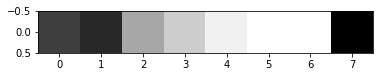

In [ ]:
plt.imshow(tabelleSett7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelle2Sett7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0


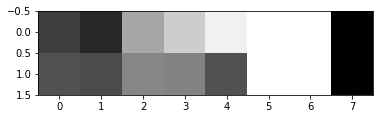

In [ ]:
plt.imshow(tabelle2Sett7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleMese7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0


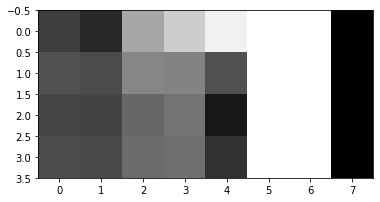

In [ ]:
plt.imshow(tabelleMese7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelle2Sett15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0


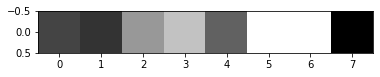

In [ ]:
plt.imshow(tabelle2Sett15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleMese15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0


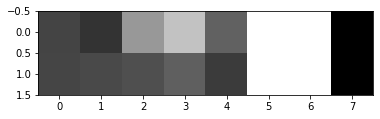

In [ ]:
plt.imshow(tabelleMese15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleMese30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0


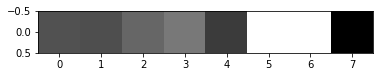

In [ ]:
plt.imshow(tabelleMese30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleBim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0


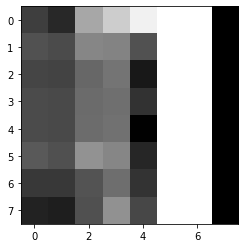

In [ ]:
plt.imshow(tabelleBim7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleBim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0


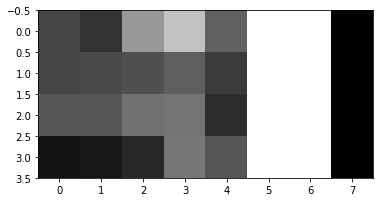

In [ ]:
plt.imshow(tabelleBim15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleBim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0


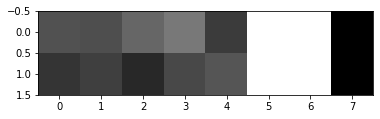

In [ ]:
plt.imshow(tabelleBim30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleTrim7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


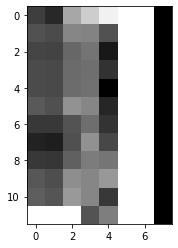

In [ ]:
plt.imshow(tabelleTrim7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleTrim15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0


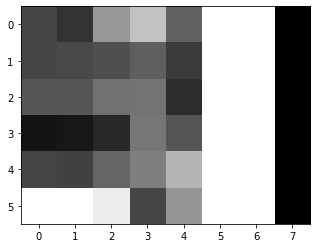

In [ ]:
plt.imshow(tabelleTrim15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleTrim30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0


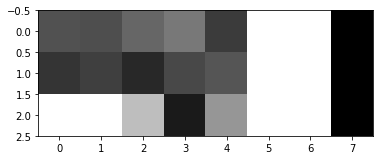

In [ ]:
plt.imshow(tabelleTrim30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleQuad7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


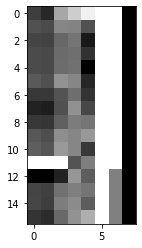

In [ ]:
plt.imshow(tabelleQuad7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleQuad15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0


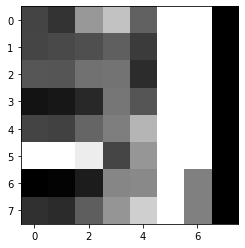

In [ ]:
plt.imshow(tabelleQuad15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleQuad30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0


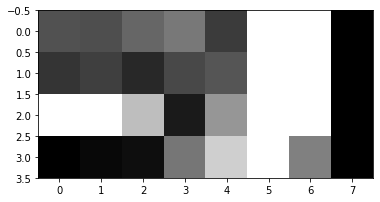

In [ ]:
plt.imshow(tabelleQuad30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleSem7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


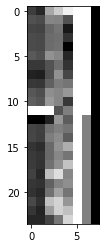

In [ ]:
plt.imshow(tabelleSem7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleSem15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


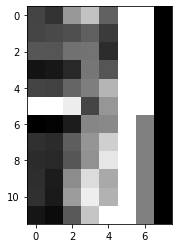

In [ ]:
plt.imshow(tabelleSem15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleSem30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0
4,39,27,99,187,169,255,128,0
5,20,0,115,250,255,255,128,0


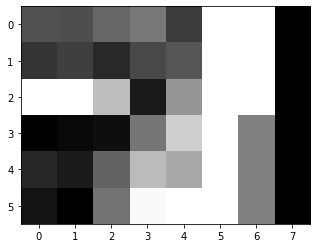

In [ ]:
plt.imshow(tabelleSem30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleNov7gg18[0]

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


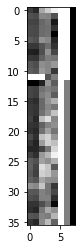

In [ ]:
plt.imshow(tabelleNov7gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleNov15gg18[0]

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


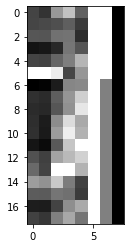

In [ ]:
plt.imshow(tabelleNov15gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tabelleNov30gg18[0]

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0
4,39,27,99,187,169,255,128,0
5,20,0,115,250,255,255,128,0
6,129,83,254,255,179,255,128,0
7,187,179,173,76,59,255,128,0
8,42,39,73,141,117,255,128,0


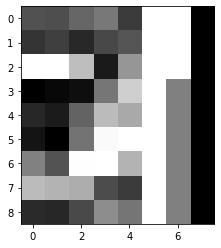

In [ ]:
plt.imshow(tabelleNov30gg18[0],cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tab7gg2018

,vendutoS2018,costoS2018,margineS2018,percMargineS2018,marginePercSpeditoMobileAverageS2018,trendMarginePercSpeditoByCompanyAndCostTypeS2018,consumi2018,prezzi2018
0,62,41,167,205,241,255,255,0
1,82,75,134,131,82,255,255,0
2,69,67,103,116,24,255,255,0
3,75,73,107,111,50,255,255,0
4,75,73,108,113,1,255,255,0
5,89,80,146,134,38,255,255,0
6,56,56,83,110,51,255,255,0
7,34,30,80,145,71,255,255,0
8,57,54,96,124,117,255,255,0
9,87,78,142,134,152,255,255,0


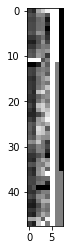

In [ ]:
plt.imshow(tab7gg2018,cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tab15gg2018

,vendutoSS2018,costoSS2018,margineSS2018,percMargineSS2018,marginePercSpeditoMobileAverageSS2018,trendMarginePercSpeditoByCompanyAndCostTypeSS2018,consumi2018,prezzi2018
0,68,51,152,194,98,255,255,0
1,69,73,79,95,59,255,255,0
2,86,85,114,115,45,255,255,0
3,19,23,41,118,85,255,255,0
4,68,66,101,126,181,255,255,0
5,255,255,237,69,150,255,255,0
6,0,3,28,134,137,255,128,0
7,48,43,94,149,207,255,128,0
8,43,40,86,145,230,255,128,0
9,46,28,140,220,169,255,128,0


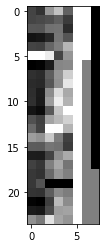

In [ ]:
plt.imshow(tab15gg2018,cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [ ]:
tab30gg2018

,vendutoM2018,costoM2018,margineM2018,percMargineM2018,marginePercSpeditoMobileAverageM2018,trendMarginePercSpeditoByCompanyAndCostTypeM2018,consumi2018,prezzi2018
0,82,78,102,120,59,255,255,0
1,53,63,40,72,85,255,255,0
2,255,255,190,26,150,255,255,0
3,0,8,14,118,207,255,128,0
4,39,27,99,187,169,255,128,0
5,20,0,115,250,255,255,128,0
6,129,83,254,255,179,255,128,0
7,187,179,173,76,59,255,128,0
8,42,39,73,141,117,255,128,0
9,61,86,0,0,0,255,128,128


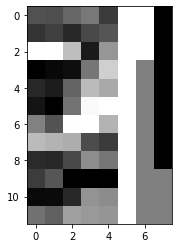

In [ ]:
plt.imshow(tab30gg2018,cmap='gray',vmin = 0, vmax = 255)
plt.show()

# Etichettatura Dataset

In [ ]:
def generaP(tabella,colonna,righe):
    p=0
    v=tabella[colonna].values
    i=1
    while(i<len(v)):
        if(v[i]>v[i-1]):
            p=p+1
        i=i+1
    return p/righe 

def generaP2(tabella,colonna,righe):
    p=0
    v=tabella[colonna].values
    for i in v:
        if(i==255):
            p=p+1
        elif(i==128):
            p=p+0.5
    return p/righe


def generaPunteggioTab(tabella,colonne,righe):
    punteggio=[]
    for i in colonne:
        if(('trend' in i) or ('consumi' in i) or ('prezzi' in i)):
            punteggio.append(generaP2(tabella,i,righe))
        else:
            punteggio.append(generaP(tabella,i,righe))
    return punteggio

def score(tabelle,colonne,righe):
    score=[]
    for i in tabelle:   
        score.append(generaPunteggioTab(i,colonne,righe))
    return score
    

In [ ]:
def normal_round(n):
    if n - math.floor(n) <= 0.5:
        return math.floor(n)
    return math.ceil(n)

def calcolaEtichette(tabsP,tabsS,numR):
    labP=[]
    labS=[]
    for i in range (numR):
        lp,ls=calcola(tabsP.iloc[i,:].values,tabsS.iloc[i,:].values)
        lp=normal_round(lp)
        ls=normal_round(ls)
        labP.append(lp)
        labS.append(ls)
    
    return labP,labS

def calcola(precedente,successivo):cut
    lp=0
    ls=0
    for i in range (len(precedente)):
        lp=lp+precedente[i]
        ls=ls+successivo[i]
        if(i>1):
            if(successivo[i]>precedente[i]):
                ls=ls+0.5
            elif(successivo[i]<precedente[i]):
                lp=lp+0.5
            elif(successivo[i]==precedente[i]):
                ls=ls+0.25
                lp=lp+0.25 
        else:
            if(successivo[i]-precedente[i]>=soglie[i]):
                ls=ls+0.5
            elif(precedente[i]-successivo[i]>=soglie[i]):
                lp=lp+0.5
    return lp,ls  

In [ ]:
soglie=[0.05,0.05]

In [ ]:
s1Mese=pd.DataFrame(score(tabelleMese7gg18,['percMargineS2018','marginePercSpeditoMobileAverageS2018','trendMarginePercSpeditoByCompanyAndCostTypeS2018','consumi2018','prezzi2018'],4),columns=['scoreMargineS2018','scoreAverageSpeditoS2018','scoreTrendSpeditoS2018','scoreConsumi2018','scorePrezzi2018'])
s1Mese

,scoreMargineS2018,scoreAverageSpeditoS2018,scoreTrendSpeditoS2018,scoreConsumi2018,scorePrezzi2018
0,0.00,0.25,1.0,1.0,0.0
1,0.50,0.75,1.0,1.0,0.0
2,0.25,0.50,1.0,1.0,0.0
3,0.50,0.50,1.0,0.5,0.0
4,0.50,0.50,1.0,0.5,0.0
5,0.25,0.75,1.0,0.5,0.0
6,0.25,0.25,1.0,0.5,0.0
7,0.25,0.25,1.0,0.5,0.0
8,0.50,0.50,1.0,0.5,0.0
9,0.25,0.00,1.0,0.5,0.5


In [ ]:
s2Mese=pd.DataFrame(score(tabelleMese7gg19,['percMargineS2019','marginePercSpeditoMobileAverageS2019','trendMarginePercSpeditoByCompanyAndCostTypeS2019','consumi2019','prezzi2019'],4),columns=['scoreMargineS2019','scoreAverageSpeditoS2019','scoreTrendSpeditoS2019','scoreConsumi2019','scorePrezzi2019'])
s2Mese

,scoreMargineS2019,scoreAverageSpeditoS2019,scoreTrendSpeditoS2019,scoreConsumi2019,scorePrezzi2019
0,0.25,0.25,1.00,0.5,0.0
1,0.75,0.50,0.75,0.5,0.0
2,0.25,0.50,1.00,0.5,0.0
3,0.25,0.25,1.00,1.0,0.0
4,0.25,0.25,1.00,1.0,0.0
5,0.25,0.50,1.00,1.0,0.0
6,0.50,0.25,1.00,0.0,0.0
7,0.25,0.50,1.00,0.0,0.0
8,0.50,0.50,1.00,0.0,0.0
9,0.75,0.25,1.00,0.0,0.5


In [ ]:
etichetteMese=calcolaEtichette(s1Mese,s2Mese,12)
etichetteMese

([3, 5, 4, 4, 4, 3, 3, 3, 3, 3, 4, 5], [3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 2, 2])

In [ ]:
def calcolaLabelBim(s1,s2):
    lp=[]
    ls=[]
    i=0
    j=1
    while(j<len(s1)):
        lp.append(normal_round((s1[i]+s1[j])/2))
        ls.append(normal_round((s2[i]+s2[j])/2))
        i=i+2
        j=j+2
    return (lp,ls)      

In [ ]:
etichetteBim=calcolaLabelBim(etichetteMese[0],etichetteMese[1])
etichetteBim

([4, 4, 3, 3, 3, 4], [3, 3, 3, 3, 3, 2])

In [ ]:
etichetteQuad=calcolaLabelBim(etichetteBim[0],etichetteBim[1])
etichetteQuad

([4, 3, 3], [3, 3, 2])

In [ ]:
s1Trim=pd.DataFrame(score(tabelleTrim7gg18,['percMargineS2018','marginePercSpeditoMobileAverageS2018','trendMarginePercSpeditoByCompanyAndCostTypeS2018','consumi2018','prezzi2018'],12),columns=['scoreMargineS2018','scoreAverageSpeditoS2018','scoreTrendSpeditoS2018','scoreConsumi2018','scorePrezzi2018'])
s1Trim

,scoreMargineS2018,scoreAverageSpeditoS2018,scoreTrendSpeditoS2018,scoreConsumi2018,scorePrezzi2018
0,0.333333,0.583333,1.0,1.0,0.0
1,0.500000,0.583333,1.0,0.5,0.0
2,0.333333,0.333333,1.0,0.5,0.0
3,0.500000,0.333333,1.0,0.5,0.5


In [ ]:
s2Trim=pd.DataFrame(score(tabelleTrim7gg19,['percMargineS2019','marginePercSpeditoMobileAverageS2019','trendMarginePercSpeditoByCompanyAndCostTypeS2019','consumi2019','prezzi2019'],12),columns=['scoreMargineS2019','scoreAverageSpeditoS2019','scoreTrendSpeditoS2019','scoreConsumi2019','scorePrezzi2019'])
s2Trim

,scoreMargineS2019,scoreAverageSpeditoS2019,scoreTrendSpeditoS2019,scoreConsumi2019,scorePrezzi2019
0,0.416667,0.416667,0.916667,0.5,0.0
1,0.333333,0.333333,1.000000,1.0,0.0
2,0.583333,0.500000,1.000000,0.0,0.0
3,0.500000,0.333333,0.833333,0.0,0.5


In [ ]:
etichetteTrim=calcolaEtichette(s1Trim,s2Trim,4)
etichetteTrim

([5, 4, 3, 4], [3, 4, 4, 2])

In [ ]:
s1Sem=pd.DataFrame(score(tabelleSem7gg18,['percMargineS2018','marginePercSpeditoMobileAverageS2018','trendMarginePercSpeditoByCompanyAndCostTypeS2018','consumi2018','prezzi2018'],24),columns=['scoreMargineS2018','scoreAverageSpeditoS2018','scoreTrendSpeditoS2018','scoreConsumi2018','scorePrezzi2018'])
s1Sem

,scoreMargineS2018,scoreAverageSpeditoS2018,scoreTrendSpeditoS2018,scoreConsumi2018,scorePrezzi2018
0,0.458333,0.583333,1.0,0.75,0.00
1,0.416667,0.375000,1.0,0.50,0.25


In [ ]:
s2Sem=pd.DataFrame(score(tabelleSem7gg19,['percMargineS2019','marginePercSpeditoMobileAverageS2019','trendMarginePercSpeditoByCompanyAndCostTypeS2019','consumi2019','prezzi2019'],24),columns=['scoreMargineS2019','scoreAverageSpeditoS2019','scoreTrendSpeditoS2019','scoreConsumi2019','scorePrezzi2019'])
s2Sem

,scoreMargineS2019,scoreAverageSpeditoS2019,scoreTrendSpeditoS2019,scoreConsumi2019,scorePrezzi2019
0,0.416667,0.375000,0.958333,0.75,0.00
1,0.583333,0.458333,0.916667,0.00,0.25


In [ ]:
etichetteSem=calcolaEtichette(s1Sem,s2Sem,2)
etichetteSem

([4, 4], [3, 3])

In [ ]:
def calcolaLabelNov(s1,s2):
    lp=[]
    ls=[]
    lp.append(normal_round((s1[0]+s1[1]+s1[2])/3))
    ls.append(normal_round((s2[0]+s2[1]+s2[2])/3))
    lp.append(s1[3])
    ls.append(s2[3])
    return (lp,ls) 

In [ ]:
etichetteNov=calcolaLabelNov(etichetteTrim[0],etichetteTrim[1])
etichetteNov

([4, 4], [4, 2])

In [ ]:
etichetteAnn=(round(np.mean(etichetteSem[0])),round(np.mean(etichetteSem[1])))
etichetteAnn

(4, 3)

In [ ]:
def calcolaLabelSett(etichetteMensili):
    labels=[]
    for i in etichetteMensili:
        for j in range (4):
            labels.append(i)
    return labels

def calcolaLabel2Sett(etichetteMensili):
    labels=[]
    for i in etichetteMensili:
        for j in range (2):
            labels.append(i)
    return labels

In [ ]:
etichetteSett=(calcolaLabelSett(etichetteMese[0]),calcolaLabelSett(etichetteMese[1]))
etichette2Sett=(calcolaLabel2Sett(etichetteMese[0]),calcolaLabel2Sett(etichetteMese[1]))

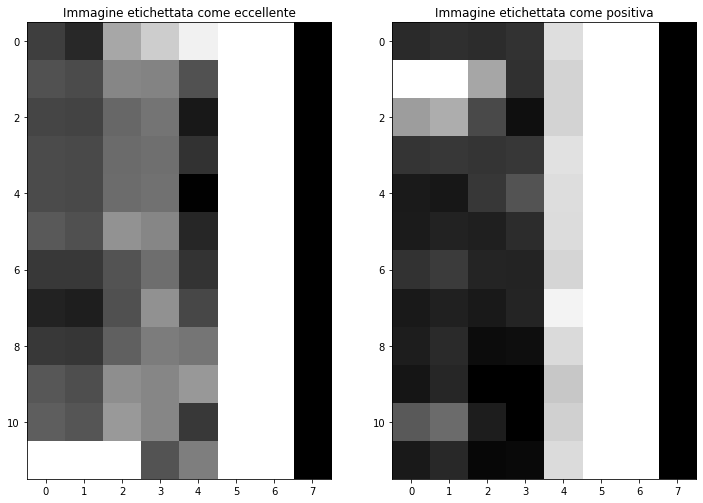

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(tabelleTrim7gg18[0],cmap='gray',vmin = 0, vmax = 255)
axes[0].set_title("Immagine etichettata come eccellente")
axes[1].imshow(tabelleTrim7gg19[1],cmap='gray',vmin = 0, vmax = 255)
axes[1].set_title("Immagine etichettata come positiva")
plt.show()

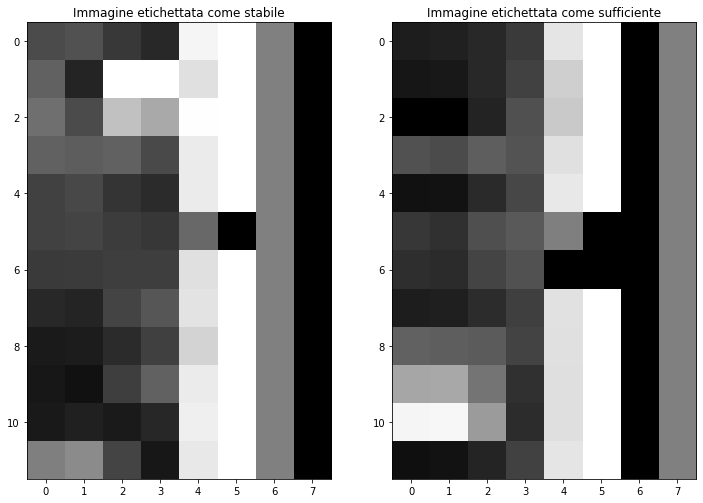

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(tabelleTrim7gg19[0],cmap='gray',vmin = 0, vmax = 255)
axes[0].set_title("Immagine etichettata come stabile")
axes[1].imshow(tabelleTrim7gg19[3],cmap='gray',vmin = 0, vmax = 255)
axes[1].set_title("Immagine etichettata come sufficiente")
plt.show()

In [ ]:
X1=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleSett7gg18,tabelleSett7gg19])]
X2=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelle2Sett7gg18,tabelle2Sett7gg19])]
X3=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleMese7gg18,tabelleMese7gg19])]


X4=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelle2Sett15gg18,tabelle2Sett15gg19])]
X5=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleMese15gg18,tabelleMese15gg19])]

X6=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleMese30gg18,tabelleMese30gg19])]


X7=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleBim7gg18,tabelleBim7gg19])]
X8=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleBim15gg18,tabelleBim15gg19])]
X9=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleBim30gg18,tabelleBim30gg19])]


X10=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleTrim7gg18,tabelleTrim7gg19])]
X11=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleTrim15gg18,tabelleTrim15gg19])]
X12=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleTrim30gg18,tabelleTrim30gg19])]

X13=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleQuad7gg18,tabelleQuad7gg19])]
X14=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleQuad15gg18,tabelleQuad15gg19])]
X15=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleQuad30gg18,tabelleQuad30gg19])]

X16=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleSem7gg18,tabelleSem7gg19])]
X17=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleSem15gg18,tabelleSem15gg19])]
X18=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleSem30gg18,tabelleSem30gg19])]

X19a=[np.concatenate([tabelleNov7gg18[0],np.zeros((48-tabelleNov7gg18[0].shape[0],8))])]
X19b=[np.concatenate([tabelleNov7gg18[1],np.zeros((48-tabelleNov7gg18[1].shape[0],8))])]
X19c=[np.concatenate([tabelleNov7gg19[0],np.zeros((48-tabelleNov7gg19[0].shape[0],8))])]
X19d=[np.concatenate([tabelleNov7gg19[1],np.zeros((48-tabelleNov7gg19[1].shape[0],8))])]
X19=np.concatenate([X19a,X19b,X19c,X19d])

X20a=[np.concatenate([tabelleNov15gg18[0],np.zeros((48-tabelleNov15gg18[0].shape[0],8))])]
X20b=[np.concatenate([tabelleNov15gg18[1],np.zeros((48-tabelleNov15gg18[1].shape[0],8))])]
X20c=[np.concatenate([tabelleNov15gg19[0],np.zeros((48-tabelleNov15gg19[0].shape[0],8))])]
X20d=[np.concatenate([tabelleNov15gg19[1],np.zeros((48-tabelleNov15gg19[1].shape[0],8))])]
X20=np.concatenate([X20a,X20b,X20c,X20d])


X21a=[np.concatenate([tabelleNov30gg18[0],np.zeros((48-tabelleNov30gg18[0].shape[0],8))])]
X21b=[np.concatenate([tabelleNov30gg18[1],np.zeros((48-tabelleNov30gg18[1].shape[0],8))])]
X21c=[np.concatenate([tabelleNov30gg19[0],np.zeros((48-tabelleNov30gg19[0].shape[0],8))])]
X21d=[np.concatenate([tabelleNov30gg19[1],np.zeros((48-tabelleNov30gg19[1].shape[0],8))])]
X21=np.concatenate([X21a,X21b,X21c,X21d])


X22=[np.concatenate([tab7gg2018,np.zeros((48-tab7gg2018.shape[0],8))])]
X23=[np.concatenate([tab7gg2019,np.zeros((48-tab7gg2019.shape[0],8))])]
X24=[np.concatenate([tab15gg2018,np.zeros((48-tab15gg2018.shape[0],8))])]
X25=[np.concatenate([tab15gg2019,np.zeros((48-tab15gg2019.shape[0],8))])]
X26=[np.concatenate([tab30gg2018,np.zeros((48-tab30gg2018.shape[0],8))])]
X27=[np.concatenate([tab30gg2019,np.zeros((48-tab30gg2019.shape[0],8))])]

In [ ]:
y1=np.concatenate([etichetteSett[0],etichetteSett[1]])
y2=np.concatenate([etichette2Sett[0],etichette2Sett[1]])
y3=np.concatenate([etichetteMese[0],etichetteMese[1]])

y7=np.concatenate([etichetteBim[0],etichetteBim[1]])

y10=np.concatenate([etichetteTrim[0],etichetteTrim[1]])

y13=np.concatenate([etichetteQuad[0],etichetteQuad[1]])

y16=np.concatenate([etichetteSem[0],etichetteSem[1]])

y19=np.concatenate([etichetteNov[0],etichetteNov[1]])

y22=[etichetteAnn[0],etichetteAnn[1]]




In [ ]:
X=np.concatenate([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27])
y=np.concatenate([y1,y2,y3,y2,y3,y3,y7,y7,y7,y10,y10,y10,y13,y13,y13,y16,y16,y16,y19,y19,y19,y22,y22,y22])

In [ ]:
print("Produco un dataset con " + str(len(X))+ " immagini")

Produco un dataset con 372 immagini


In [ ]:
X = X.reshape(X.shape[0], 8, 48, 1)

In [ ]:
X = X.astype('float32')

In [ ]:
X=X/255

In [ ]:
X=np.array([st.resize(i, (100, 100)) for i in X])

In [ ]:
y=y.astype(np.uint8)

# Bilanciamento del Dataset 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler()
X=X.reshape(len(X),100*100)
X,y=ros.fit_resample(X,y)
print((Counter(y)))

Counter({3: 194, 5: 194, 4: 194, 2: 194})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Tuning classificatori

In [ ]:
X = X.reshape(X.shape[0], 100, 100)

In [ ]:
def saveM(model,fname):
    fname=fname+'.model'
    pkl.dump(model, open(fname, 'wb'))

def loadM(fname):
    return pkl.load(open(fname+'.model', 'rb'))

def saveNN(model,fname):
    json_model = model.to_json()
    open(fname + '.json', 'w').write(json_model)
    model.save_weights(fname + '.h5', overwrite=True)

def loadNN(fname):
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model = model_from_json(open(fname+'.json').read())
    model.load_weights(fname+'.h5')
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
def tuningRandomForest(X_train,y_train):
  param_rf_grid = {'n_estimators': [10,50,100],
               'max_depth': [25,50,75,100]}
  rf = RandomForestClassifier(random_state=42)
  grid_search = GridSearchCV(rf,param_rf_grid, n_jobs = -1)
  grid_search.fit(X_train, y_train)
  print("Best Param:", grid_search.best_params_)
  best_rf = grid_search.best_estimator_
  return best_rf


def tuningAdaBoostClassifier(X_train,y_train):
    param_ada_grid={'n_estimators':[10,50,100,500],
                    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
                   }
    ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm='SAMME.R')
    grid_search=GridSearchCV(ada,param_ada_grid,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_ada = grid_search.best_estimator_
    return best_ada


def tuningKNN(X_train,y_train,knn):
    params = {'n_neighbors': range(1, 21, 2),
              'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan', 'minkowski']
             }
    grid_search = GridSearchCV(knn, params,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_KNN = grid_search.best_estimator_
    return best_KNN

def tuningSVC(X_train,y_train,svc):
    param_svc_grid ={'kernel': ['poly', 'linear', 'rbf','sigmoid'],
                      'C' : [500, 300 ,200, 150, 100, 50, 10, 1],
                     'gamma': ['scale']
                    }
    grid_search = GridSearchCV(svc, param_svc_grid,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_svc = grid_search.best_estimator_
    return best_svc


class MyClassificatorTrain(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self

    def transform(self, X,y):
        X=X.reshape(len(X),100*100)
        X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                     test_size=0.2,shuffle=True)
        print("Training modelli...")
        print("AdaBoost...")
        ada_best=tuningAdaBoostClassifier(X_train,y_train)
        print("Tuning SVC...")
        svc_clf=SVC()
        svc_best = tuningSVC(X_train,y_train,svc_clf)
        print("Tuning KNN...")
        knn_clf=KNeighborsClassifier()
        knn_best=tuningKNN(X_train,y_train,knn_clf)
        print("Random Forest...")
        rf_best=tuningRandomForest(X_train,y_train)
        print("Fatto!")

In [ ]:
MyClassificatorTrain().transform(X,y)

Training modelli...
AdaBoost...
Best Param: {'learning_rate': 0.001, 'n_estimators': 100}
Tuning SVC...
Best Param: {'C': 300, 'gamma': 'scale', 'kernel': 'rbf'}
Tuning KNN...
Best Param: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Random Forest...
Best Param: {'max_depth': 25, 'n_estimators': 100}
Fatto!


# Tuning LeNet

In [ ]:
def create_network():
    lenet = Sequential()
    lenet.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(100, 100, 1)))
    lenet.add(MaxPool2D(strides=2))
    lenet.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    lenet.add(MaxPool2D(strides=2))
    lenet.add(Flatten())
    lenet.add(Dense(256, activation='relu'))
    lenet.add(Dense(84, activation='relu'))
    lenet.add(Dense(4, activation='softmax'))
    adam = Adam(learning_rate=5e-4)
    lenet.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    return lenet
    
   
    
def preNN(X,y,i,j):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    y = to_categorical(y)    
    y = np.argmax(y, axis=1)
    X = X.reshape((len(X),100,100,1))
    X=np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X])
    y=np.concatenate([y,y,y,y,y,y,y,y,y,y,y,y])
    return X,y
    

def tuningNN(X_train, X_test, y_train, y_test,epochs):
    model = create_network()
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                patience=3,
                                verbose=0,
                                factor=0.2,
                                min_learning_rate=1e-6)
    history = model.fit(X_train, y_train, batch_size=100, steps_per_epoch=len(X_train) / 100, epochs=epochs,
                        validation_data=(X_test, y_test), callbacks=[reduce_lr],verbose=0)
    


  
   
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

     

class MyClassificatorTrainNN(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self

    def transform(self, X,y,epochs):
        print("Preprocessing per NN...")
        X,y=preNN(X,y,i,j)
        X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                        test_size=0.2) 
        print("Tuning NN...")
        tuningNN(X_train, X_test, y_train, y_test,epochs)

Preprocessing per NN...
Tuning NN...


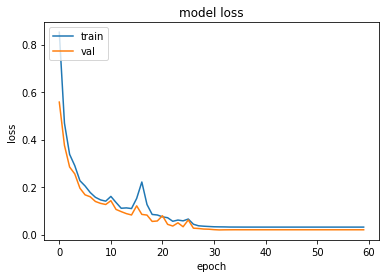

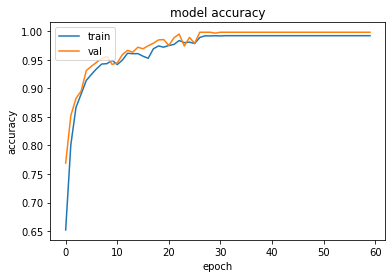

In [ ]:
MyClassificatorTrainNN().transform(X,y,60)

# Fase di Training e creazione dei modelli

In [ ]:
strkf=KFold(n_splits=10)
score_KFold=[]

In [ ]:
X=X.reshape(len(X),100*100)

In [ ]:
def trasformN(y_test,pred):
    diz={'pessimo':1,'sufficiente':2,'stabile':3,'positivo':4,'eccellente':5}
    y_test_n=[]
    pred_n=[]
    for i in y_test:
        y_test_n.append(diz[i])
    for j in pred:
        pred_n.append(diz[j])
    return label_binarize(y_test_n, classes=[1,2,3,4,5]),label_binarize(pred_n, classes=[1,2,3,4,5])

def confusionMat(clf,X_test,y_test,typeC):
    if (typeC==1):
        datagen_test = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
        datagen_test.fit(X_test)
        iterator = datagen_test.flow(X_test, y_test, batch_size=len(X_test), shuffle=False)
        X_test, y_test = iterator.next()
        pred = np.argmax(clf.predict(X_test), axis=-1)
        
    else:
        pred = clf.predict(X_test)
    score=accuracy_score(y_test, pred)
    ax =sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5) 
    plt.show()
    if(clf.__class__.__name__==AdaBoostClassifier):
        print(classification_report(y_test, pred,zero_division=1,target_names=['sufficiente','stabile','positivo','eccellente']))
    else:
        print(classification_report(y_test, pred,target_names=['sufficiente','stabile','positivo','eccellente']))

def compute_performance(estimator,strkf,X, y):
    score = cross_validate(estimator, X ,y,cv=strkf ,scoring='accuracy',return_estimator=True,n_jobs=-1)
    model=score['estimator']
    results=score['test_score']
    mean_accuracy=np.round(np.mean(results),3)
    mean_std= np.round(np.std(results),3)
    maxAcc=np.round((np.max(results)),3)
    argMaxAcc=np.argmax(results)
    saveM(model[argMaxAcc],estimator.__class__.__name__)
    print("L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore ")
    print(results)
    print("Ottenendo un'accuratezza media di " + str(mean_accuracy)+" con deviazione standard di "+ str(mean_std))
    print("La migliore accuratezza e' "+ str(maxAcc) + " ottenuta nello split numero " + str(argMaxAcc+1))
    print("Salvo il modello ottenuto nello split numero " + str(argMaxAcc+1))
    print("Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero " + str(argMaxAcc+1))
    test_fold=[]
    for train_index, test_index in strkf.split(X, y):
            test_fold.append(test_index)
    confusionMat(model[argMaxAcc],X[test_fold[argMaxAcc]],y[test_fold[argMaxAcc]],0)
    return (mean_accuracy,mean_std) 

def compute_performance_nn(estimator,strkf,X,y):
    model_fold=[]
    test_fold=[]
    acc_fold=[]
    loss_fold=[]
    X,y=preNN(X,y,100,100)
    fold_no = 1
    for train, test in strkf.split(X,y):
            model = create_network()
            model = create_network()
            reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=0, factor=0.2, min_learning_rate=1e-6)
            history = model.fit(X[train], y[train], steps_per_epoch=len(X[train]) / 100, epochs=35,
                        validation_data=(X[test], y[test]), callbacks=[reduce_lr],verbose=0)
            scores = model.evaluate(X[test], y[test],verbose=0)
            acc_fold.append(scores[1])
            loss_fold.append(scores[0])
            test_fold.append(test)
            model_fold.append(model)
            fold_no = fold_no + 1
    mean_accuracy=np.round(np.mean(acc_fold),3)
    mean_std= np.round(np.std(acc_fold),3)
    maxAcc=np.round((np.max(acc_fold)),3)
    argMaxAcc=np.argmax(acc_fold)
    print('Score per fold')
    saveNN(model_fold[argMaxAcc],"NN")
    print("L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore ")
    print(acc_fold)
    print("Ottenendo un'accuratezza media di " + str(mean_accuracy)+" con deviazione standard di "+ str(mean_std))
    print("La migliore accuratezza e' "+ str(maxAcc) + " ottenuta nello split numero " + str(argMaxAcc+1))
    
    
    
    print("Salvo il modello ottenuto nello split numero " + str(argMaxAcc+1))
    print("Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero " + str(argMaxAcc+1))
    confusionMat(model_fold[argMaxAcc],X[test_fold[argMaxAcc]],y[test_fold[argMaxAcc]],1)
    return (mean_accuracy,mean_std)

# Analisi dei risultati ottenuti

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.69230769 0.6025641  0.51282051 0.57692308 0.66666667 0.58974359
 0.5974026  0.62337662 0.64935065 0.63636364]
Ottenendo un'accuratezza media di 0.615 con deviazione standard di 0.048
La migliore accuratezza e' 0.692 ottenuta nello split numero 1
Salvo il modello ottenuto nello split numero 1
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 1


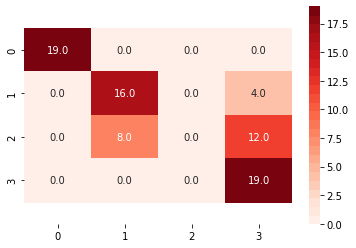

              precision    recall  f1-score   support

 sufficiente       1.00      1.00      1.00        19
     stabile       0.67      0.80      0.73        20
    positivo       0.00      0.00      0.00        20
  eccellente       0.54      1.00      0.70        19

    accuracy                           0.69        78
   macro avg       0.55      0.70      0.61        78
weighted avg       0.55      0.69      0.60        78



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100, learning_rate=0.01,algorithm='SAMME.R')
mean_ada,std_ada=compute_performance(clf_ada,strkf,X, y)
score_KFold.append((mean_ada,std_ada))

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.73076923 0.78205128 0.76923077 0.83333333 0.88461538 0.82051282
 0.90909091 0.87012987 0.87012987 0.84415584]
Ottenendo un'accuratezza media di 0.831 con deviazione standard di 0.053
La migliore accuratezza e' 0.909 ottenuta nello split numero 7
Salvo il modello ottenuto nello split numero 7
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 7


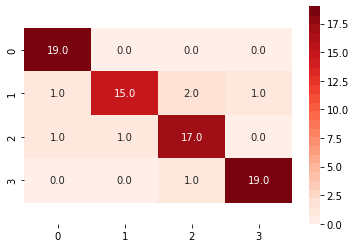

              precision    recall  f1-score   support

 sufficiente       0.90      1.00      0.95        19
     stabile       0.94      0.79      0.86        19
    positivo       0.85      0.89      0.87        19
  eccellente       0.95      0.95      0.95        20

    accuracy                           0.91        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.91      0.91      0.91        77



In [ ]:
clf_svc=SVC(kernel='rbf', C=500, gamma='scale')
mean_svc,std_svc=compute_performance(clf_svc,strkf,X, y)
score_KFold.append((mean_svc,std_svc))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.8974359  0.85897436 0.87179487 0.79487179 0.82051282 0.88461538
 0.96103896 0.8961039  0.87012987 0.79220779]
Ottenendo un'accuratezza media di 0.865 con deviazione standard di 0.049
La migliore accuratezza e' 0.961 ottenuta nello split numero 7
Salvo il modello ottenuto nello split numero 7
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 7


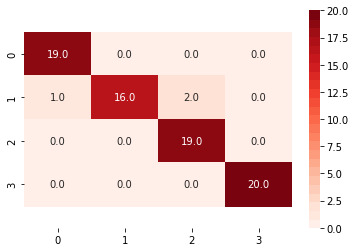

              precision    recall  f1-score   support

 sufficiente       0.95      1.00      0.97        19
     stabile       1.00      0.84      0.91        19
    positivo       0.90      1.00      0.95        19
  eccellente       1.00      1.00      1.00        20

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=1, weights='distance',metric='manhattan')
mean_knn,std_knn=compute_performance(clf_knn,strkf,X, y)
score_KFold.append((mean_knn,std_knn))

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.88461538 0.93589744 0.87179487 0.92307692 0.92307692 0.88461538
 0.97402597 0.92207792 0.94805195 0.81818182]
Ottenendo un'accuratezza media di 0.909 con deviazione standard di 0.042
La migliore accuratezza e' 0.974 ottenuta nello split numero 7
Salvo il modello ottenuto nello split numero 7
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 7


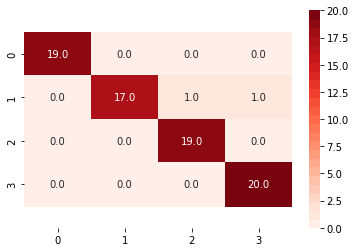

              precision    recall  f1-score   support

 sufficiente       1.00      1.00      1.00        19
     stabile       1.00      0.89      0.94        19
    positivo       0.95      1.00      0.97        19
  eccellente       0.95      1.00      0.98        20

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77



In [ ]:
clf_rf = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=25)
mean_rf,std_rf=compute_performance(clf_rf,strkf,X, y)
score_KFold.append((mean_rf,std_rf))

Score per fold
L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.9774678349494934, 0.9828326106071472, 0.9914070963859558, 0.9914070963859558, 0.9903329610824585, 0.980665922164917, 0.9914070963859558, 0.989258885383606, 0.9967776536941528, 0.994629442691803]
Ottenendo un'accuratezza media di 0.989 con deviazione standard di 0.006
La migliore accuratezza e' 0.997 ottenuta nello split numero 9
Salvo il modello ottenuto nello split numero 9
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 9


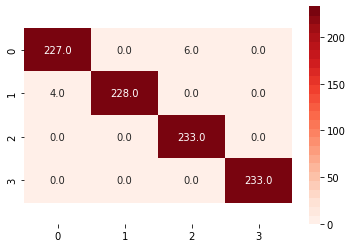

              precision    recall  f1-score   support

 sufficiente       0.98      0.97      0.98       233
     stabile       1.00      0.98      0.99       232
    positivo       0.97      1.00      0.99       233
  eccellente       1.00      1.00      1.00       233

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



In [ ]:
clf_nn=KerasClassifier(build_fn=create_network)
mean_nn,std_nn=compute_performance_nn(clf_nn,strkf,X, y)
score_KFold.append((mean_nn,std_nn))

# Scelta del modello migliore

In [ ]:
score_df = pd.DataFrame(score_KFold,index=['AdaBoost','SVC','KNN','RF','LeNet'],columns=['accuracy_mean','std'])

In [ ]:
def foldPlot(score_KFold,labels):
    values=[]
    for i,j in score_KFold:
        values.append(i)
        values.append(j)  
    plt.figure()
    c=['green','yellow','blue','red','orange']
    data=np.array(values).reshape(len(labels),2)
    accuracy=data[:,0]
    stdr=data[:,1]
    std=data[:,1]/np.max(data[:,1])
    size=[500]*10  
    for i in range(len(c)):
        l=labels[i]
        acc=accuracy[i]
        sx=stdr[i]
        plt.scatter([acc],[acc],s=std[i]*acc*2000,color=[c[i]])
        st1="{0} Acc:{1:.2f}%".format(l,acc*100.0)
        plt.scatter([], [], color=[c[i]], s=std[i]*200,
                label=st1+" ")
    plt.grid(linestyle="--")
    plt.legend(loc='lower left', bbox_to_anchor=(0.4, 1),
          ncol=1, fancybox=True, shadow=True)
    plt.axis([np.min(accuracy)-.05, np.max(accuracy)+.05,np.min(accuracy)-.05, np.max(accuracy)+.05])
    plt.show()

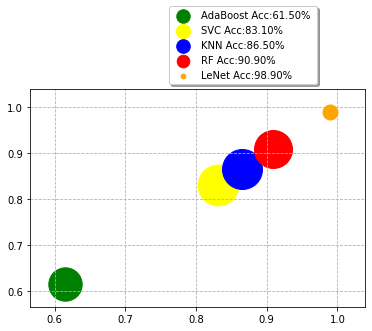

In [ ]:
labels=score_df.index.values
foldPlot(score_KFold,labels)

# Test della rete sul Dataset 2020

In [ ]:
bimestre20=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleBim7gg20])]
trimestre20=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleTrim15gg20])]
semestre20=[np.concatenate([i,np.zeros((48-i.shape[0],8))]) for i in np.concatenate([tabelleSem30gg20])]
anno20=[np.concatenate([tab30gg2020,np.zeros((48-tab30gg2020.shape[0],8))])]

In [ ]:
nn_model = loadNN("./"+"NN")

In [ ]:
def processing(T,nn_model):
    T=np.concatenate([T])
    T=T.reshape(T.shape[0],8,48,1)
    T = T.astype('float32')
    T=T/255
    T=np.array([st.resize(i, (100, 100)) for i in T])
    T= T.reshape((len(T),100,100,1))
    pred = np.argmax(nn_model.predict(T), axis=-1)
    return pred
    


def convertiEtichetta(pred):
    diz={0:'sufficiente',1:'stabile',2:'positivo',3:'eccellente'}#fix degli indici automatizzati dalla rete
    label_predicted=[diz[i] for i in pred]       
    return label_predicted 
    
    

In [ ]:
label_predictedTrim=convertiEtichetta(processing(trimestre20,nn_model))
label_predictedSem=convertiEtichetta(processing(semestre20,nn_model))
label_predictedAnno=convertiEtichetta(processing(anno20,nn_model))

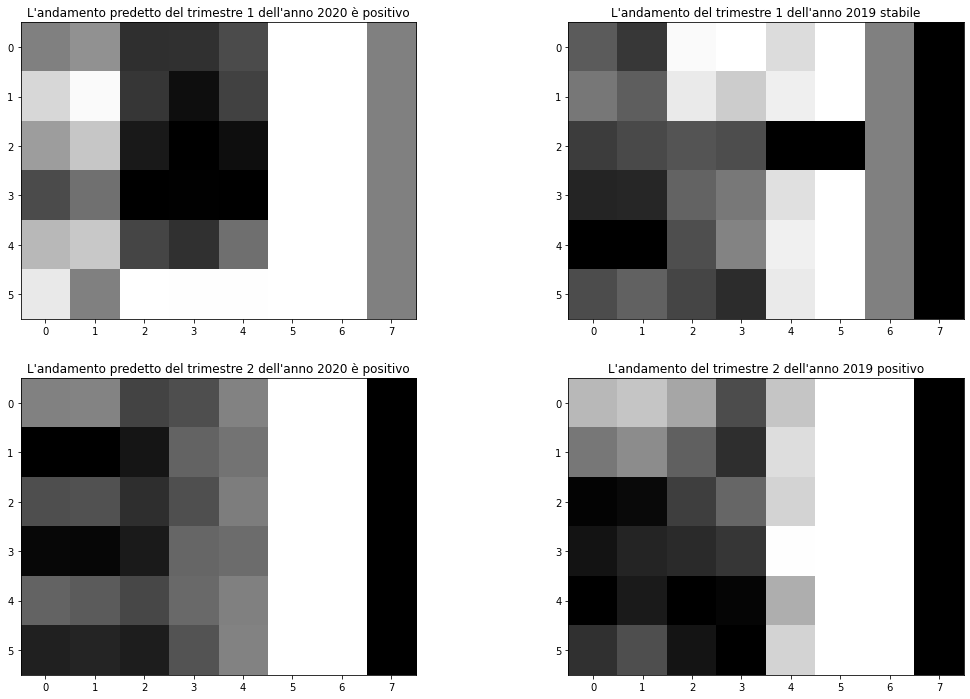

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0][0].imshow(tabelleTrim15gg20[0],cmap='gray',vmin = 0, vmax = 255)
axes[0][0].set_title("L'andamento predetto del trimestre 1 dell'anno 2020 è "+ label_predictedTrim[0])
axes[0][1].imshow(tabelleTrim15gg19[0],cmap='gray',vmin = 0, vmax = 255)
axes[0][1].set_title("L'andamento del trimestre 1 dell'anno 2019 stabile")
axes[1][0].imshow(tabelleTrim15gg20[1],cmap='gray',vmin = 0, vmax = 255)
axes[1][0].set_title("L'andamento predetto del trimestre 2 dell'anno 2020 è "+ label_predictedTrim[1])
axes[1][1].imshow(tabelleTrim15gg19[1],cmap='gray',vmin = 0, vmax = 255)
axes[1][1].set_title("L'andamento del trimestre 2 dell'anno 2019 positivo")
plt.show()

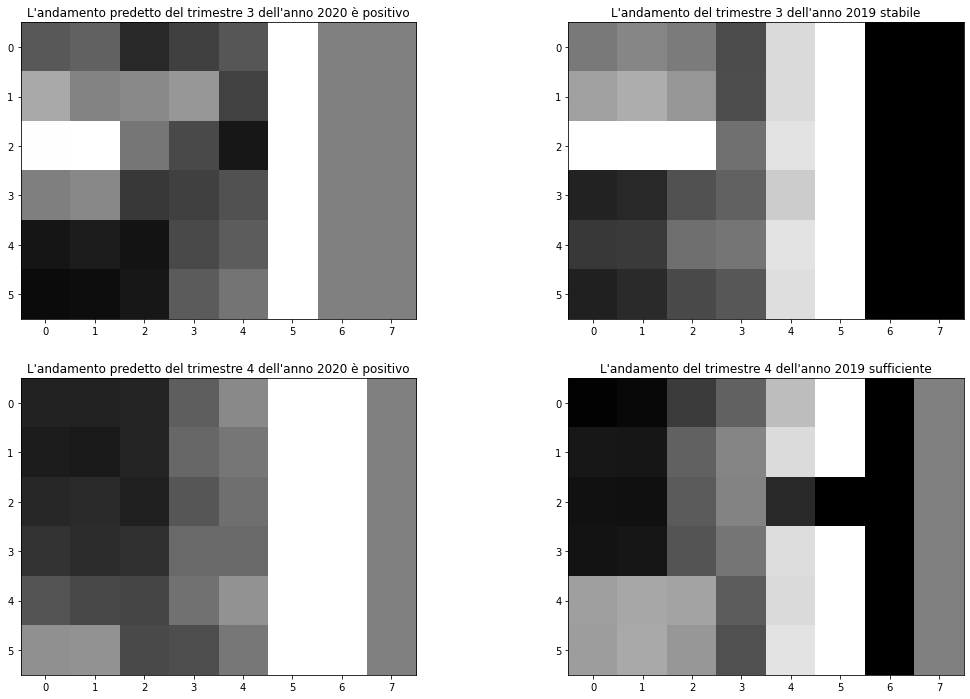

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes[0][0].imshow(tabelleTrim15gg20[2],cmap='gray',vmin = 0, vmax = 255)
axes[0][0].set_title("L'andamento predetto del trimestre 3 dell'anno 2020 è "+ label_predictedTrim[0])
axes[0][1].imshow(tabelleTrim15gg19[2],cmap='gray',vmin = 0, vmax = 255)
axes[0][1].set_title("L'andamento del trimestre 3 dell'anno 2019 stabile")
axes[1][0].imshow(tabelleTrim15gg20[3],cmap='gray',vmin = 0, vmax = 255)
axes[1][0].set_title("L'andamento predetto del trimestre 4 dell'anno 2020 è "+ label_predictedTrim[1])
axes[1][1].imshow(tabelleTrim15gg19[3],cmap='gray',vmin = 0, vmax = 255)
axes[1][1].set_title("L'andamento del trimestre 4 dell'anno 2019 sufficiente")
plt.show()

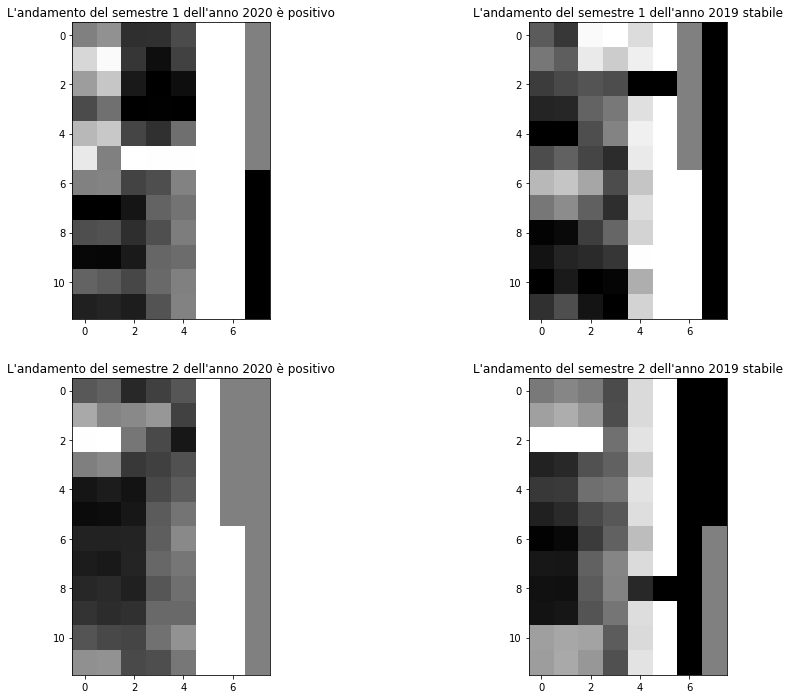

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0][0].imshow(tabelleSem15gg20[0],cmap='gray',vmin = 0, vmax = 255)
axes[0][0].set_title("L'andamento del semestre 1 dell'anno 2020 è "+ label_predictedSem[0])
axes[0][1].imshow(tabelleSem15gg19[0],cmap='gray',vmin = 0, vmax = 255)
axes[0][1].set_title("L'andamento del semestre 1 dell'anno 2019 stabile")
axes[1][0].imshow(tabelleSem15gg20[1],cmap='gray',vmin = 0, vmax = 255)
axes[1][0].set_title("L'andamento del semestre 2 dell'anno 2020 è "+ label_predictedSem[1])
axes[1][1].imshow(tabelleSem15gg19[1],cmap='gray',vmin = 0, vmax = 255)
axes[1][1].set_title("L'andamento del semestre 2 dell'anno 2019 stabile")

plt.show()

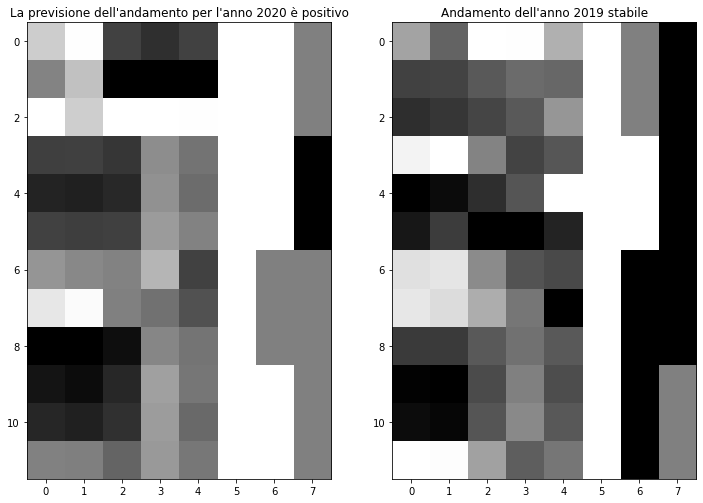

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(tab30gg2020,cmap='gray',vmin = 0, vmax = 255)
axes[0].set_title("La previsione dell'andamento per l'anno 2020 è "+ label_predictedBim[0])
axes[1].imshow(tab30gg2019,cmap='gray',vmin = 0, vmax = 255)
axes[1].set_title("Andamento dell'anno 2019 stabile")
plt.show()

# Anomaly Detection

In [ ]:
def importDataset(X,y):
    r,c=X[0].shape
    X=np.array([st.resize(i, (100, 100)) for i in X])
    return np.array(X).reshape(len(X),100*100)/255,np.array(y).reshape(len(X))

In [ ]:
x,y=importDataset(X,y)

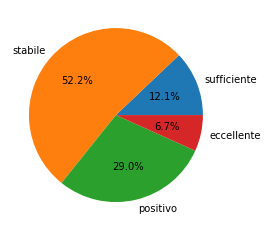

In [ ]:
columns = [str(i) for i in range(100*100)]
ds=pd.DataFrame(x,columns=columns)

ds['class']=y

unique, counts = np.unique(y, return_counts=True)

ds["class"]=ds["class"].replace(unique[0],1)

ds["class"]=ds["class"].replace(unique[1:],0)


onlyMostPopular=ds[ds["class"]==1]
onlyNotPopular=ds[ds["class"]==0]

diz={2:'sufficiente',3:'stabile',4:'positivo',5:'eccellente'}
unique=[diz[i] for i in unique] 

plt.pie(counts,labels=unique,autopct='%1.1f%%')
plt.show()

# Detector con PCA

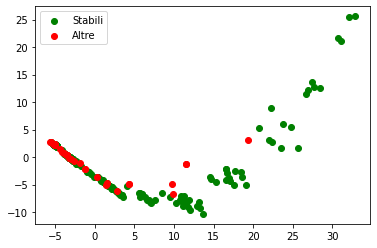

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(ds)

row = 0
col = 1

plt.scatter(components[:,row][ds["class"]==0],components[:,col][ds["class"]==0],c='g',label='Stabili')
plt.scatter(components[:,row][ds["class"]==1],components[:,col][ds["class"]==1],c='r',label='Altre')
plt.legend(loc="upper left")
plt.show()

In [ ]:
def loadXY(DATA):
    y = DATA['class']
    x=DATA.drop("class",axis=1).values
    return x,y

def mse(predictions,reals):
    n_columns=reals.shape[1]
    reals=list(reals)
    predictions=list(predictions)
    errors=[]
    for i in range(len(reals)):
        prediction=predictions[i]
        real=reals[i]
        error=prediction-real
        error=error**2
        error=np.sum(error)
        error=error/n_columns
        errors.append(error)
    return np.array(errors)  

def predict(arr,err_max):
    predictions=[]
    i=0
    for err in list(arr):
        if err <err_max:
            predictions.append(1)
        else:
            predictions.append(0)
        i+=1    
    return predictions

def predictLabels(pca,x,error):
    predictions=predictions=pca.inverse_transform(pca.transform(x))
    errors=mse(predictions,x)
    return np.array(predict(errors,error))

def perf_measure(y_actual, y_predicted):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_predicted).ravel()
    return(tp/(tp+fn), fp/(tn+fp))

def roc(values,predictions,labels,plot=False):
    error=mse(predictions,values)
    roc_x=[]
    roc_y=[]
    roc=0
    oldfpr=0
    oldtpr=0
    steps=100
    scaler = MinMaxScaler(feature_range=(0,1))
    error =1- scaler.fit_transform(error.reshape(-1,1))
    fpr,tpr,th=metrics.roc_curve(labels,error)
    for i in range(len(fpr)):
        FPR,TPR=fpr[i],tpr[i]
        roc+=(TPR+oldtpr)*(FPR-oldfpr)/2
        oldfpr=FPR
        oldtpr=TPR
        roc_x.append(FPR)
        roc_y.append(TPR)        
    if plot:
        plt.plot([0]+roc_x, [0]+roc_y, label='ROC curve (area = %0.3f)' % roc)
        plt.plot([0,1], [0,1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
    return roc

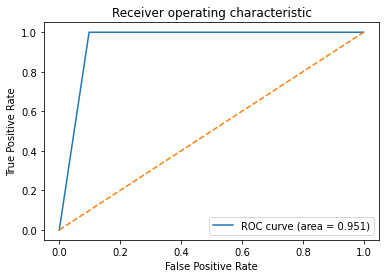

0.9510703363914373

In [ ]:
pca = PCA(n_components=42)

g_x,g_y=loadXY(onlyMostPopular)
n_x,n_y=loadXY(onlyNotPopular)
good_x_train, good_x_test, good_y_train, good_y_test = train_test_split(g_x,g_y,test_size=0.05,shuffle=True)    
an_x_train, an_x_test, an_y_train, an_y_test = train_test_split(n_x,n_y,test_size=0.2,shuffle=True)    

pca.fit(good_x_train)

p_g=pca.inverse_transform(pca.transform(good_x_test))
r_g=good_x_test
p_b=pca.inverse_transform(pca.transform(n_x))
r_b=n_x



values=np.concatenate((good_x_test,n_x))
labels=np.concatenate((good_y_test,n_y))

predictions=pca.inverse_transform(pca.transform(values))

roc(values,predictions,labels,plot=True)